<a href="https://colab.research.google.com/github/CristaldoWeint/FMAP-Trabajo-Final_CRISTALDO_MAURICIO/blob/main/FMAP_Trabajo_Final_CRISTALDO_MAURICIO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

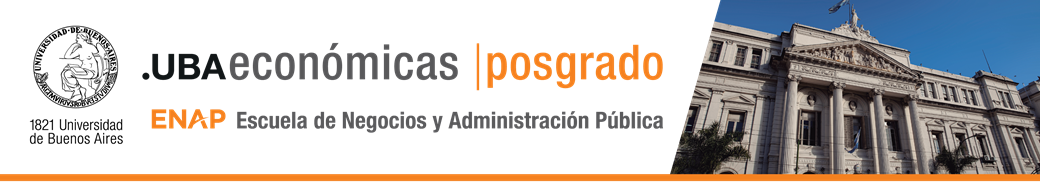

# **MAESTRÍA EN GESTIÓN Y ANÁLISIS DE DATOS FINANCIEROS**  

## • Asignatura: **FUNDAMENTOS DE MÉTODOS PREDICTIVOS**

 • Profesores:  Rodrigo del Rosso -Patricia Girimonte

 • Alumno: Mauricio Emanuel Cristaldo Valenzuela



 • **Evaluación Final**  




 Esta evaluación final tiene como objetivo aplicar los temas desarrollados en la materia sobre un conjunto de datos de interés relacionado preferentemente con el ámbito de las finanzas. Se valorará la aplicación al área, de no ser posible deberá ser explicada con claridad la problemática elegida.



El presente dataframe contiene información de indices financieros del sector asegurador argentino ocurridos durante el año 2024 (se reportaron 4 quarters).

El objetivo sera predecir el loss ratio, que es un  indice de evaluacion de gestion sobre los siniestros devengados / primas emitidas en el mercado y como influyen las variables.



# 0- Inicio

> Bibliotecas

In [1]:
# Bibliotecas para manejo de datos y archivos
import kagglehub  # Para obtener la base de datos
import os  # Para trabajar con archivos
import pandas as pd  # Para manipulación de datos en formato tabular
import numpy as np  # Para operaciones numéricas con matrices, vectores y escalares

# Bibliotecas para visualización
import matplotlib.pyplot as plt  # Para graficar
import seaborn as sns  # Para visualizaciones avanzadas
import missingno as msno  # Para análisis de datos perdidos

# Bibliotecas para preprocesamiento
from sklearn.preprocessing import StandardScaler  # Para escalar variables
from sklearn.decomposition import PCA  # Para reducción de dimensionalidad

# Modelos de machine learning
from sklearn.svm import SVC  # Para Support Vector Machines
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree  # Para árboles de decisión
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingClassifier  # Para modelos de ensemble
import xgboost as xgb  # Para XGBoost

# Herramientas para evaluación y validación
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, GridSearchCV  # Para partición de datos y validación cruzada
from sklearn.metrics import (precision_score, recall_score, accuracy_score, f1_score,
                             classification_report, confusion_matrix, r2_score,
                             mean_absolute_error, median_absolute_error,
                             mean_absolute_percentage_error, mean_squared_error)  # Para métricas de evaluación




> Obtencion de dataframe

In [2]:
#obtener el DF a trabajar
file_name = "EEPP_EERR_Indices_2024.csv" #/root/.cache/kagglehub/datasets/mauriciocristaldo/ssn-indices-2024/versions/2/ssn_indices_de_mercado.xlsx
file_path = None
path = kagglehub.dataset_download("mauriciocristaldo/ssn-eepp-eerr-indicadores-2024-12")

print("Path to dataset files:", path)

# Buscar el archivo en el directorio descargado
for root, dirs, files in os.walk(path):
    if file_name in files:
        file_path = os.path.join(root, file_name)
        break


100%|██████████| 180k/180k [00:00<00:00, 545kB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/mauriciocristaldo/ssn-eepp-eerr-indicadores-2024-12/versions/2


In [3]:
data = pd.read_csv(file_path, sep=";")
data0 = data.copy() #Dejar una version original por si necesitamos recuperar infomracion más adelante
data

Entidad NJ          Denominación                  Sector     Quarter  \
0          1  A           AFIANZADORA  Patrimoniales y Mixtas  31/12/2024   
1          2  C             AGROSALTA  Patrimoniales y Mixtas  31/12/2024   
2          3  A                  ALBA  Patrimoniales y Mixtas  31/12/2024   
3          4  A               ALLIANZ  Patrimoniales y Mixtas  31/12/2024   
4          5  A             ANTÁRTIDA  Patrimoniales y Mixtas  31/12/2024   
..       ... ..                   ...                     ...         ...   
758       12  A  SAN CRISTÓBAL RETIRO       Seguros de Retiro   31/3/2024   
759       13  A        SEGUNDA RETIRO       Seguros de Retiro   31/3/2024   
760       14  A            SMG RETIRO       Seguros de Retiro   31/3/2024   
761       15  A      SOLVENCIA RETIRO       Seguros de Retiro   31/3/2024   
762       16  A         ZURICH RETIRO       Seguros de Retiro   31/3/2024   

        A           B  A- Disponibilidades  A- Inversiones   A- Creditos  ...  \
0    0.09      40.00             322285.32    5.255642e+06  3.177921e+06  ...   
1    0.08   5.449.00            4238758.68    7.830170e+07  2.331874e+07  ...   
2    0.05      76.00             246204.11    3.210142e+06  2.152299e+06  ...   
3    2.74   2.711.00           14423748.50    3.148950e+08  1.781400e+08  ...   
4    0.04   2.189.00             285568.23    8.606103e+05  1.475519e+06  ...   
..    ...         ...                  ...             ...           ...  ...   
758  0.14      32.00            1259328.14    1.040833e+08  9.868184e+05  ...   
759  0.08           0            244913.96    7.691014e+07  2.063213e+06  ...   
760  0.02      17.00             322953.61    5.573159e+07  1.736069e+06  ...   
761  0.00           0            228667.26    2.081958e+06  1.683263e+04  ...   
762  0.00         0                2606.44    1.956864e+06  3.718403e+04  ...   

     RF -  Resultados porTenencia  RF -  OtrosIngresos  RF -  OtrosEgresos  \
0                            0.00               784.55          -159371.16   
1                     16475539.59                 0.00         -1259692.82   
2                       563624.54               821.07           -18036.91   
3                     31694209.31            137538.02                0.00   
4                        11946.62                 0.00                0.00   
..                            ...                  ...                 ...   
758                   15977993.82            123262.39        -54738583.95   
759                   55722847.33                 0.00          1113390.08   
760                   23338444.18              4547.84           -22171.60   
761                     358577.75                 0.00                0.00   
762                     560368.99            -80714.50                0.00   

     RF -  Gastos deExplotacion yOtros Cargos  RF -  RECPAM  RF -  TOTAL  \
0                                  -814882.46    -756533.76     65452.04   
1                                  -190001.27  -17074384.95   -184341.17   
2                                  -622240.12   -1516400.87   -764423.14   
3                                 -2603829.32  -86017093.99 -21975461.01   
4                                  -516804.78    -890177.14  -4701028.27   
..                                        ...           ...          ...   
758                                 -99780.82  -19227923.77   -738309.52   
759                                -635254.53  -85207971.47   2578030.78   
760                                 -86582.02  -66595217.92   -180397.73   
761                                  -2674.39   -1618040.39    -47795.09   
762                                      0.00   -2032100.65    -15427.46   

     RF -  ResultadoOperacionesOrdinarias  \
0                               858047.70   
1                            -14664919.24   
2                              -463405.14   
3                            -18120755.79   
4                             -5

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 763 entries, 0 to 762
Data columns (total 73 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Entidad                                           763 non-null    int64  
 1   NJ                                                763 non-null    object 
 2   Denominación                                      763 non-null    object 
 3   Sector                                            763 non-null    object 
 4   Quarter                                           763 non-null    object 
 5   A                                                 763 non-null    float64
 6   B                                                 763 non-null    object 
 7   A- Disponibilidades                               763 non-null    float64
 8   A- Inversiones                                    763 non-null    float64
 9   A- Creditos          

> Tranformacion de variables: Pasar a númericas las columnas

In [5]:
data['B'] = data['B'].str.replace(r'\.00$', '', regex=False) #para mejor lectura del dato y corrija el tipo object
data['B'] = data['B'].str.replace('.', '', regex=False)
data['B'] = data['B'].astype('Int64')
data

Entidad NJ          Denominación                  Sector     Quarter  \
0          1  A           AFIANZADORA  Patrimoniales y Mixtas  31/12/2024   
1          2  C             AGROSALTA  Patrimoniales y Mixtas  31/12/2024   
2          3  A                  ALBA  Patrimoniales y Mixtas  31/12/2024   
3          4  A               ALLIANZ  Patrimoniales y Mixtas  31/12/2024   
4          5  A             ANTÁRTIDA  Patrimoniales y Mixtas  31/12/2024   
..       ... ..                   ...                     ...         ...   
758       12  A  SAN CRISTÓBAL RETIRO       Seguros de Retiro   31/3/2024   
759       13  A        SEGUNDA RETIRO       Seguros de Retiro   31/3/2024   
760       14  A            SMG RETIRO       Seguros de Retiro   31/3/2024   
761       15  A      SOLVENCIA RETIRO       Seguros de Retiro   31/3/2024   
762       16  A         ZURICH RETIRO       Seguros de Retiro   31/3/2024   

        A       B  A- Disponibilidades  A- Inversiones   A- Creditos  ...  \
0    0.09    4000            322285.32    5.255642e+06  3.177921e+06  ...   
1    0.08  544900           4238758.68    7.830170e+07  2.331874e+07  ...   
2    0.05    7600            246204.11    3.210142e+06  2.152299e+06  ...   
3    2.74  271100          14423748.50    3.148950e+08  1.781400e+08  ...   
4    0.04  218900            285568.23    8.606103e+05  1.475519e+06  ...   
..    ...     ...                  ...             ...           ...  ...   
758  0.14    3200           1259328.14    1.040833e+08  9.868184e+05  ...   
759  0.08       0            244913.96    7.691014e+07  2.063213e+06  ...   
760  0.02    1700            322953.61    5.573159e+07  1.736069e+06  ...   
761  0.00       0            228667.26    2.081958e+06  1.683263e+04  ...   
762  0.00       0              2606.44    1.956864e+06  3.718403e+04  ...   

     RF -  Resultados porTenencia  RF -  OtrosIngresos  RF -  OtrosEgresos  \
0                            0.00               784.55          -159371.16   
1                     16475539.59                 0.00         -1259692.82   
2                       563624.54               821.07           -18036.91   
3                     31694209.31            137538.02                0.00   
4                        11946.62                 0.00                0.00   
..                            ...                  ...                 ...   
758                   15977993.82            123262.39        -54738583.95   
759                   55722847.33                 0.00          1113390.08   
760                   23338444.18              4547.84           -22171.60   
761                     358577.75                 0.00                0.00   
762                     560368.99            -80714.50                0.00   

     RF -  Gastos deExplotacion yOtros Cargos  RF -  RECPAM  RF -  TOTAL  \
0                                  -814882.46    -756533.76     65452.04   
1                                  -190001.27  -17074384.95   -184341.17   
2                                  -622240.12   -1516400.87   -764423.14   
3                                 -2603829.32  -86017093.99 -21975461.01   
4                                  -516804.78    -890177.14  -4701028.27   
..                                        ...           ...          ...   
758                                 -99780.82  -19227923.77   -738309.52   
759                                -635254.53  -85207971.47   2578030.78   
760                                 -86582.02  -66595217.92   -180397.73   
761                                  -2674.39   -1618040.39    -47795.09   
762                                      0.00   -2032100.65    -15427.46   

     RF -  ResultadoOperacionesOrdinarias  \
0                               858047.70   
1                            -14664919.24   
2                              -463405.14   
3                            -18120755.79   
4                             -5721826.96   
..                                 

In [6]:
#Variables de tipo Object se recategoriza a categorías numéricas.
cols_object = data.select_dtypes(include=['object']).columns.tolist() #Contador
for col in cols_object:
    data[col] = data[col].astype('category').cat.codes +1 #Recategorización

print(f"Recategorización de columnas de tipo Object a categorías numéricas:\n")
print(f"Número de columnas de tipo Object recategorizadas: {len(cols_object)}")
print(f"Número de columnas numéricas: {data.select_dtypes(include=['number']).shape[1]}")

Recategorización de columnas de tipo Object a categorías numéricas:

Número de columnas de tipo Object recategorizadas: 4
Número de columnas numéricas: 73


In [7]:
def categorize_top(data): #Variable Dummy
    data['top'] = 4

    for quarter in data['Quarter'].unique():
        quarter_df = data[data['Quarter'] == quarter]
        sorted_df = quarter_df.sort_values(by='A', ascending=False).reset_index()

        for idx in range(len(sorted_df)):
            if idx < 10:  # Top 10
                data.loc[sorted_df.loc[idx, 'index'], 'top'] = 1
            elif idx < 19:  # Posiciones 11-19
                data.loc[sorted_df.loc[idx, 'index'], 'top'] = 2
            elif idx < 49:  # Posiciones 20-49
                data.loc[sorted_df.loc[idx, 'index'], 'top'] = 3
            else:  # El resto ya tiene 4 por defecto
                pass

    return data

data = categorize_top(data)

In [8]:
data.head()

Entidad  NJ  Denominación  Sector  Quarter     A       B  \
0        1   1             1       1        3  0.09    4000   
1        2   2             2       1        3  0.08  544900   
2        3   1             3       1        3  0.05    7600   
3        4   1             4       1        3  2.74  271100   
4        5   1             7       1        3  0.04  218900   

   A- Disponibilidades  A- Inversiones   A- Creditos  ...  \
0            322285.32    5.255642e+06  3.177921e+06  ...   
1           4238758.68    7.830170e+07  2.331874e+07  ...   
2            246204.11    3.210142e+06  2.152299e+06  ...   
3          14423748.50    3.148950e+08  1.781400e+08  ...   
4            285568.23    8.606103e+05  1.475519e+06  ...   

   RF -  OtrosIngresos  RF -  OtrosEgresos  \
0               784.55          -159371.16   
1                 0.00         -1259692.82   
2               821.07           -18036.91   
3            137538.02                0.00   
4                 0.00                0.00   

   RF -  Gastos deExplotacion yOtros Cargos  RF -  RECPAM  RF -  TOTAL  \
0                                -814882.46    -756533.76     65452.04   
1                                -190001.27  -17074384.95   -184341.17   
2                                -622240.12   -1516400.87   -764423.14   
3                               -2603829.32  -86017093.99 -21975461.01   
4                                -516804.78    -890177.14  -4701028.27   

   RF -  ResultadoOperacionesOrdinarias  \
0                             858047.70   
1                          -14664919.24   
2                            -463405.14   
3                          -18120755.79   
4                           -5721826.96   

   RF -  Resultado OperacionesExtraordinarias  RF -  Impuestoa lasGanancias  \
0                                         0.0                    -208830.67   
1                                         0.0                          0.00   
2                                         0.0                     -69993.51   
3                                         0.0                    5402294.35   
4                                         0.0                          0.00   

   RF -  RESULTADODELEJERCICIO  top  
0                    649217.03    4  
1                 -14664919.24    4  
2                   -533398.64    4  
3                 -12718461.44    2  
4                  -5721826.96    4  

[5 rows x 74 columns]

> Recálculo de A

dado que solo ha llegado con valor 0,00% queremos avirguar un centil más para llevarlo a valores de 0,000%

In [9]:
columna_sector = [3]
columna_sector

[3]

In [10]:
columna_trimestre = data.columns[4] #posicion actual de quarte
columna_valor = data.columns[45] #posicion actual de sd - total
columna_participacion_nueva = 'A_rec'
data[columna_valor] = pd.to_numeric(data[columna_valor], errors='coerce') # Asegurarnos de que la columna de valor es numérica

if columna_trimestre not in data.columns:
    print(f"¡ERROR! La columna '{columna_trimestre}' no existe.")
    print("Por favor, edita el script con el nombre correcto de tu columna de trimestre.")
else:
    data['Total_Trimestral'] = data.groupby([columna_trimestre])[columna_valor].transform('sum') # 1. Calcular la suma total POR TRIMESTRE

    # 2. Calcular la nueva participación (con * 100)
    #    Usamos np.where para evitar dividir por 0 si un 'Total_Trimestral' fuera 0.
    data[columna_participacion_nueva] = np.where(
        data['Total_Trimestral'] == 0,
        0, # Si el total es 0, la participación es 0
        (data[columna_valor] / data['Total_Trimestral']) * 100
    )

    print("\nCálculo realizado:")
    # Mostramos algunas filas para comparar la A original con la recalculada
    print(data[['A', columna_participacion_nueva,  columna_trimestre, columna_valor]].head(10))
    print("\nEstadísticas de la nueva columna:")
    print(data[columna_participacion_nueva].describe())




Cálculo realizado:
      A     A_rec  Quarter  SD -  PrimasEmitidas
0  0.09  0.086393        3          7.286381e+06
1  0.08  0.082152        3          6.928729e+06
2  0.05  0.046357        3          3.909768e+06
3  2.74  2.738927        3          2.310008e+08
4  0.04  0.039326        3          3.316729e+06
5  0.01  0.014764        3          1.245196e+06
6  0.03  0.032966        3          2.780381e+06
7  0.02  0.024851        3          2.095936e+06
8  0.03  0.027344        3          2.306215e+06
9  0.45  0.446715        3          3.767586e+07

Estadísticas de la nueva columna:
count    7.630000e+02
mean     5.242464e-01
std      1.195923e+00
min     -2.566795e-10
25%      1.804152e-02
50%      8.770573e-02
75%      3.348944e-01
max      9.287585e+00
Name: A_rec, dtype: float64


In [11]:
data = data.abs() #Convertir los valores en absolutos para mejorar la comparabilidad

In [12]:
data.head()

Entidad  NJ  Denominación  Sector  Quarter     A       B  \
0        1   1             1       1        3  0.09    4000   
1        2   2             2       1        3  0.08  544900   
2        3   1             3       1        3  0.05    7600   
3        4   1             4       1        3  2.74  271100   
4        5   1             7       1        3  0.04  218900   

   A- Disponibilidades  A- Inversiones   A- Creditos  ...  \
0            322285.32    5.255642e+06  3.177921e+06  ...   
1           4238758.68    7.830170e+07  2.331874e+07  ...   
2            246204.11    3.210142e+06  2.152299e+06  ...   
3          14423748.50    3.148950e+08  1.781400e+08  ...   
4            285568.23    8.606103e+05  1.475519e+06  ...   

   RF -  Gastos deExplotacion yOtros Cargos  RF -  RECPAM  RF -  TOTAL  \
0                                 814882.46     756533.76     65452.04   
1                                 190001.27   17074384.95    184341.17   
2                                 622240.12    1516400.87    764423.14   
3                                2603829.32   86017093.99  21975461.01   
4                                 516804.78     890177.14   4701028.27   

   RF -  ResultadoOperacionesOrdinarias  \
0                             858047.70   
1                           14664919.24   
2                             463405.14   
3                           18120755.79   
4                            5721826.96   

   RF -  Resultado OperacionesExtraordinarias  RF -  Impuestoa lasGanancias  \
0                                         0.0                     208830.67   
1                                         0.0                          0.00   
2                                         0.0                      69993.51   
3                                         0.0                    5402294.35   
4                                         0.0                          0.00   

   RF -  RESULTADODELEJERCICIO  top  Total_Trimestral     A_rec  
0                    649217.03    4      8.433989e+09  0.086393  
1                  14664919.24    4      8.433989e+09  0.082152  
2                    533398.64    4      8.433989e+09  0.046357  
3                  12718461.44    2      8.433989e+09  2.738927  
4                   5721826.96    4      8.433989e+09  0.039326  

[5 rows x 76 columns]

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 763 entries, 0 to 762
Data columns (total 76 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Entidad                                           763 non-null    int64  
 1   NJ                                                763 non-null    int8   
 2   Denominación                                      763 non-null    int16  
 3   Sector                                            763 non-null    int8   
 4   Quarter                                           763 non-null    int8   
 5   A                                                 763 non-null    float64
 6   B                                                 763 non-null    Int64  
 7   A- Disponibilidades                               763 non-null    float64
 8   A- Inversiones                                    763 non-null    float64
 9   A- Creditos          

# CONSIGNAS



# 1- Imputación de datos faltantes

Evaluar la cantidad de datos faltantes en el dataset, tanto a nivel columna como a nivel fila.

Para el caso de datos faltantes por columnas indicar el porcentaje de registros que cumplen esta condición. Con respecto a datos faltantes a nivel columna, calcular la distribución de la cantidad de columnas con datos faltantes por fila.

In [14]:
# explorando la cantidad de valores perdidos en las variables
data_null = pd.DataFrame(data.isna().sum()/data.shape[0]*100)
data_null

0
Entidad                       0.0
NJ                            0.0
Denominación                  0.0
Sector                        0.0
Quarter                       0.0
...                           ...
RF -  Impuestoa lasGanancias  0.0
RF -  RESULTADODELEJERCICIO   0.0
top                           0.0
Total_Trimestral              0.0
A_rec                         0.0

[76 rows x 1 columns]

<Axes: >

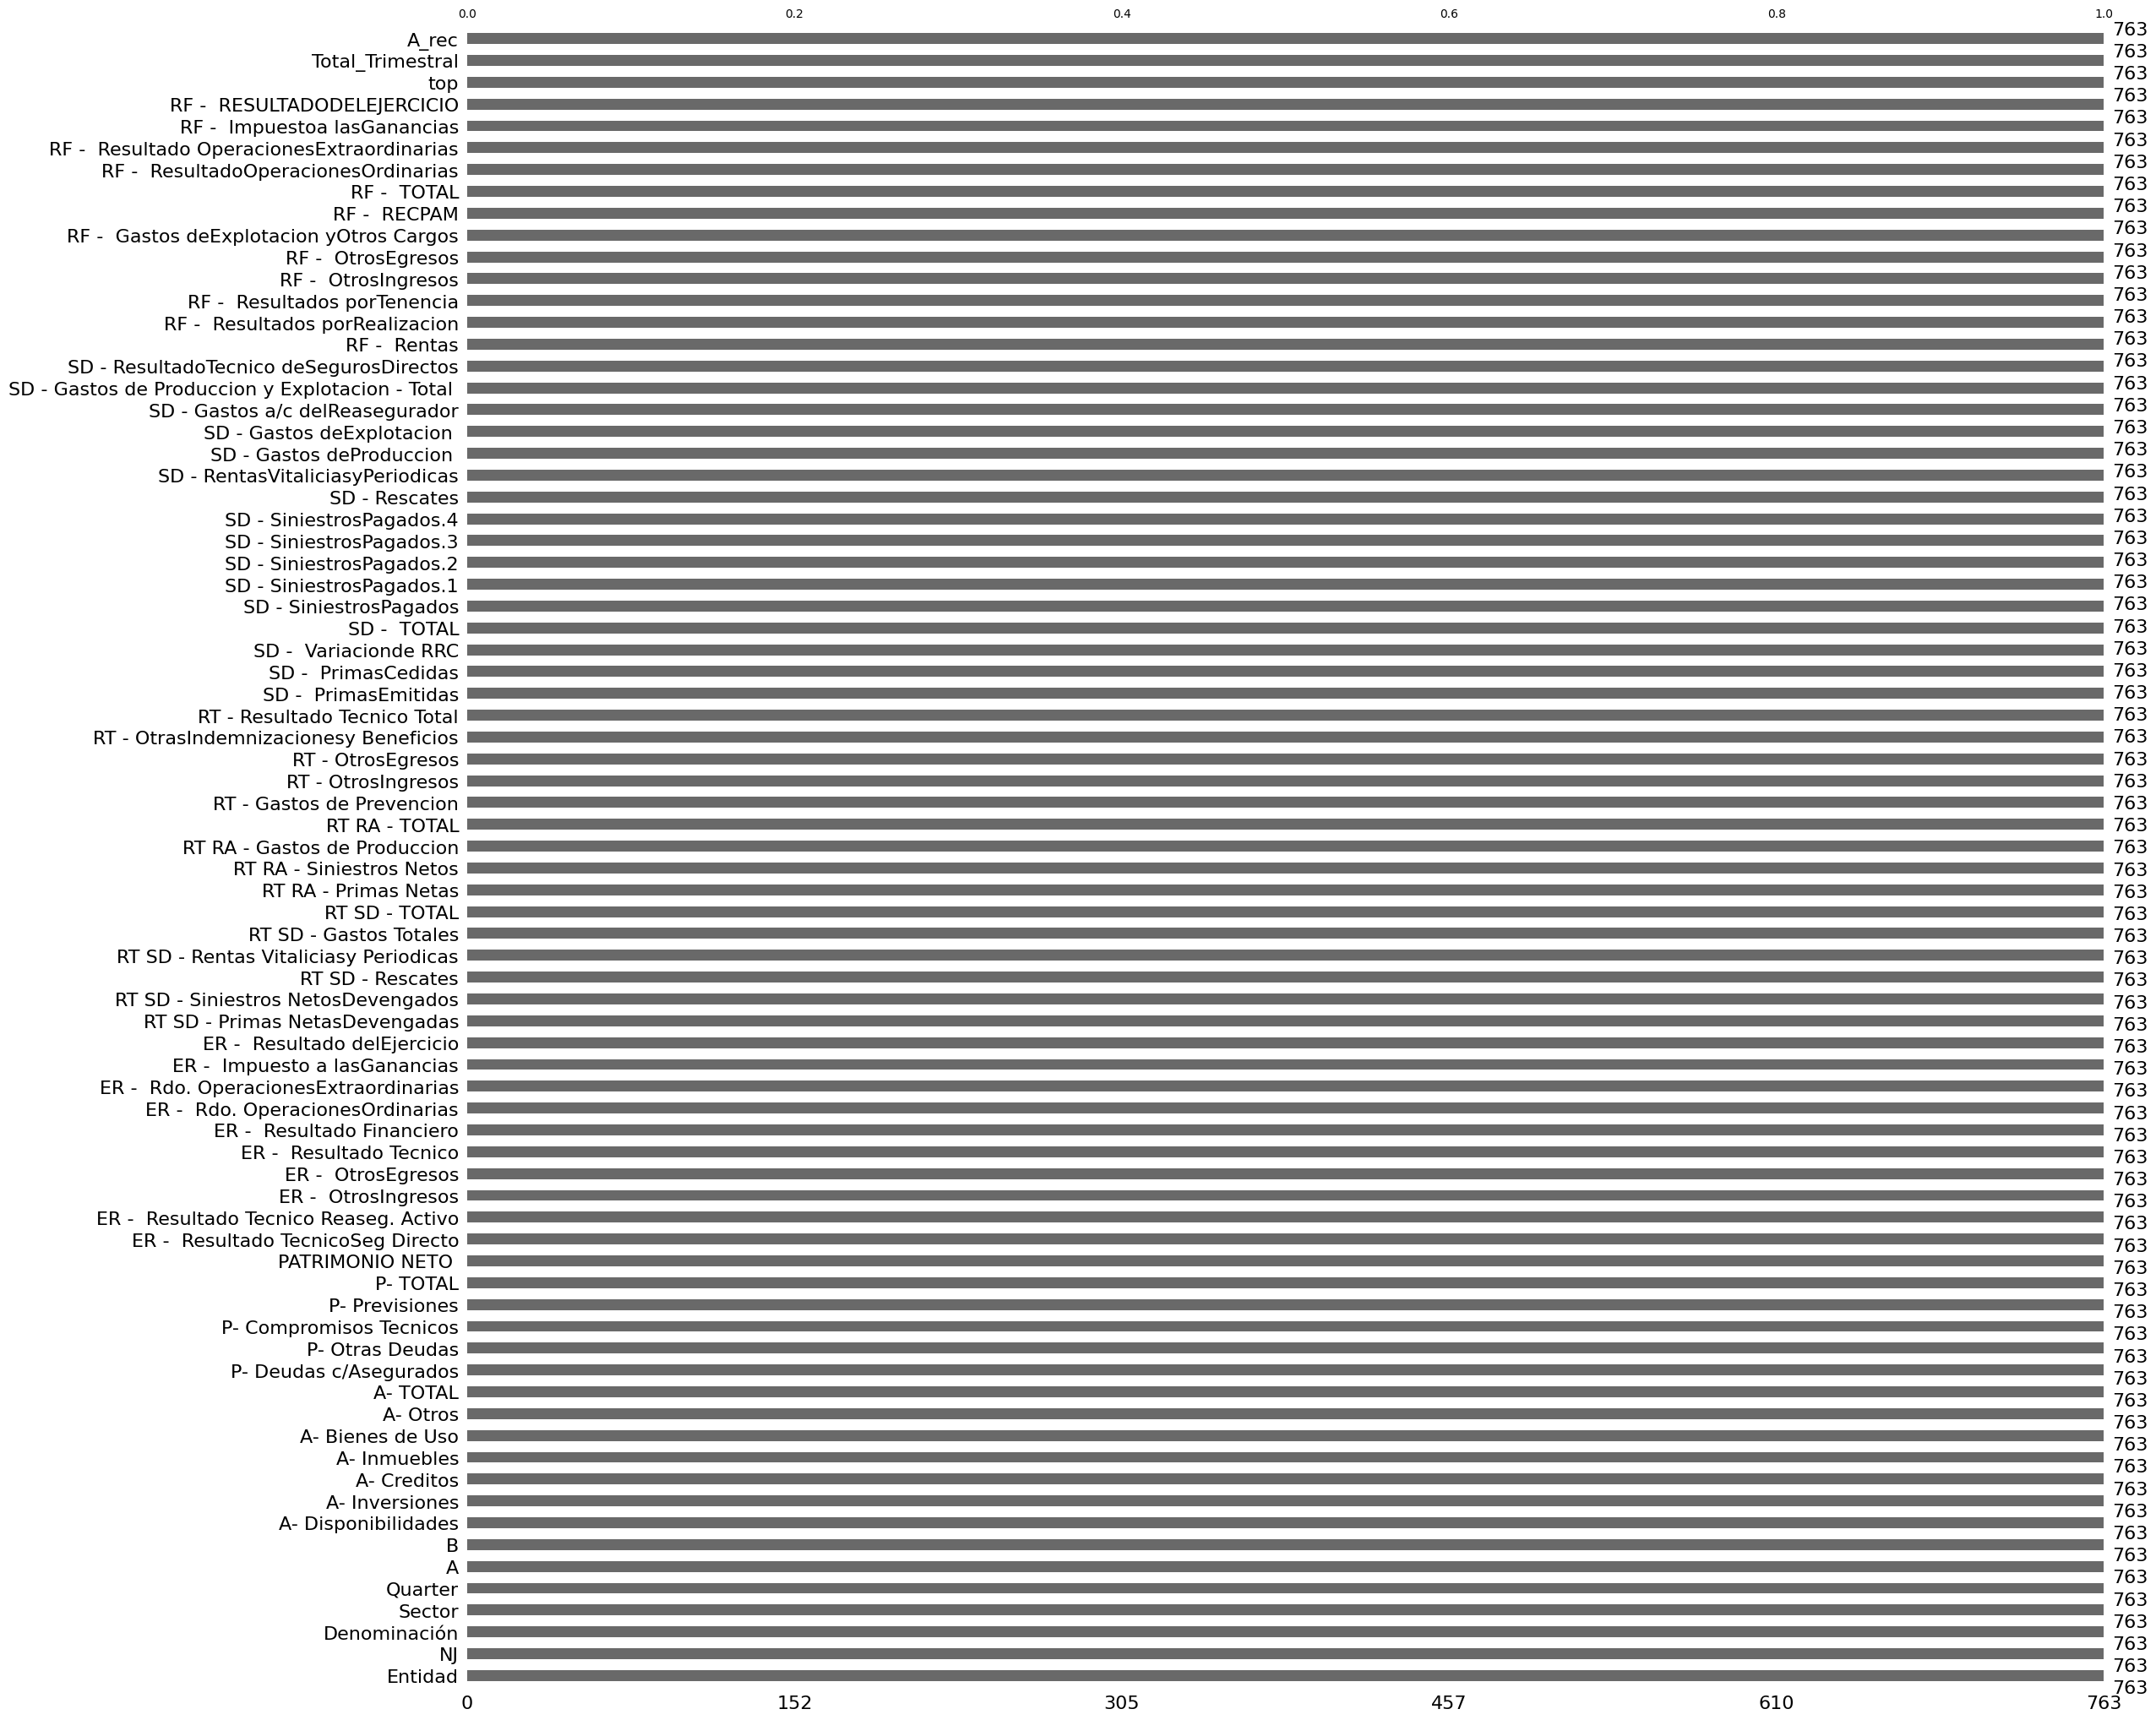

In [15]:
# bar missing
msno.bar(data)

>> No se detectaron valores faltantes

# 2-Análisis exploratorio

Realizar un análisis exploratorio sobre distintas variables de interés (mínimo una categórica y 2 cuantitativas). Se deben tener en cuenta tanto variables cuantitativas como cualitativas, y se deben utilizar tanto gráficos como medidas de resumen de las mismas. Comentar si se aprecian relaciones entre ellas, y en tal caso analizarlas.


Se realiza: 1) exploracion del indice de participacion del mercado y el indice de cantidad de juicios en tramites
2) se analizan outliers y se elimina pos analisis por su bajo impacto en las variables (mejora en visualizacion  de juicios por sector)
3) exploracion contable con Activos y Pasivos

##  2.1 Exploracion de sector en participacion del mercado y Cantidad de Juicios en Tramite.

In [16]:
mapeo_sectores = {
    1: 'PM: Patrimoniales y Mixtas',
    2: 'ART: Riesgos del Trabajo',
    3: 'TRANS: Transporte Público Pasajeros',
    4: 'VIDA: Seguros de Vida',
    5: 'RETIRO: Seguros de Retiro'
}

<ipython-input-17-b9dff971c1ac>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Sector', y='A_rec', data=data,


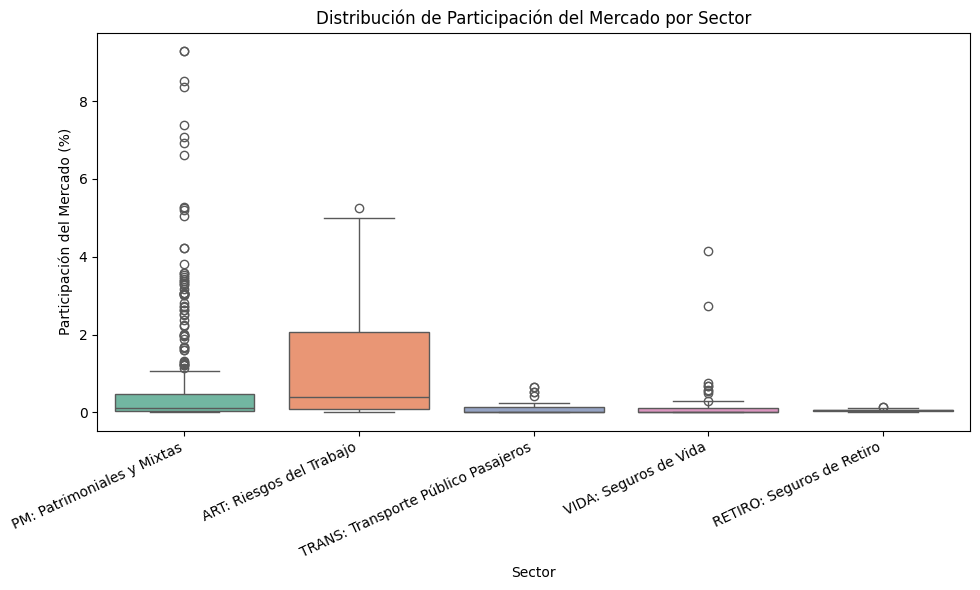

In [17]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Sector', y='A_rec', data=data,
            palette='Set2')
plt.title('Distribución de Participación del Mercado por Sector')
plt.xlabel('Sector')
plt.ylabel('Participación del Mercado (%)')
plt.xticks(ticks=range(len(mapeo_sectores)), labels=mapeo_sectores.values(), rotation=25, ha='right')
plt.tight_layout()
plt.show()

*   Mayor dominancia de ART seguido de PM con valores extremos por encima de los 8% de participacion.
*    ART tiene una participacion promedio superando el 1% y con puntos extremos de participacion de 5 puntos aproximadamente.
*    Hay bajo impacto en el mercado por parte de los seguros de retiro.

<ipython-input-18-571af065d2c0>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(
<ipython-input-18-571af065d2c0>:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(mapeo_sectores.values(), rotation=25, ha='right')
<ipython-input-18-571af065d2c0>:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(mapeo_sectores.values(), rotation=25, ha='right')
<ipython-input-18-571af065d2c0>:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(mapeo_sectores.values(), rotation=25, ha='right')
<ipython-input-18-571af065d2c0>:29: UserWarning: set_tickl

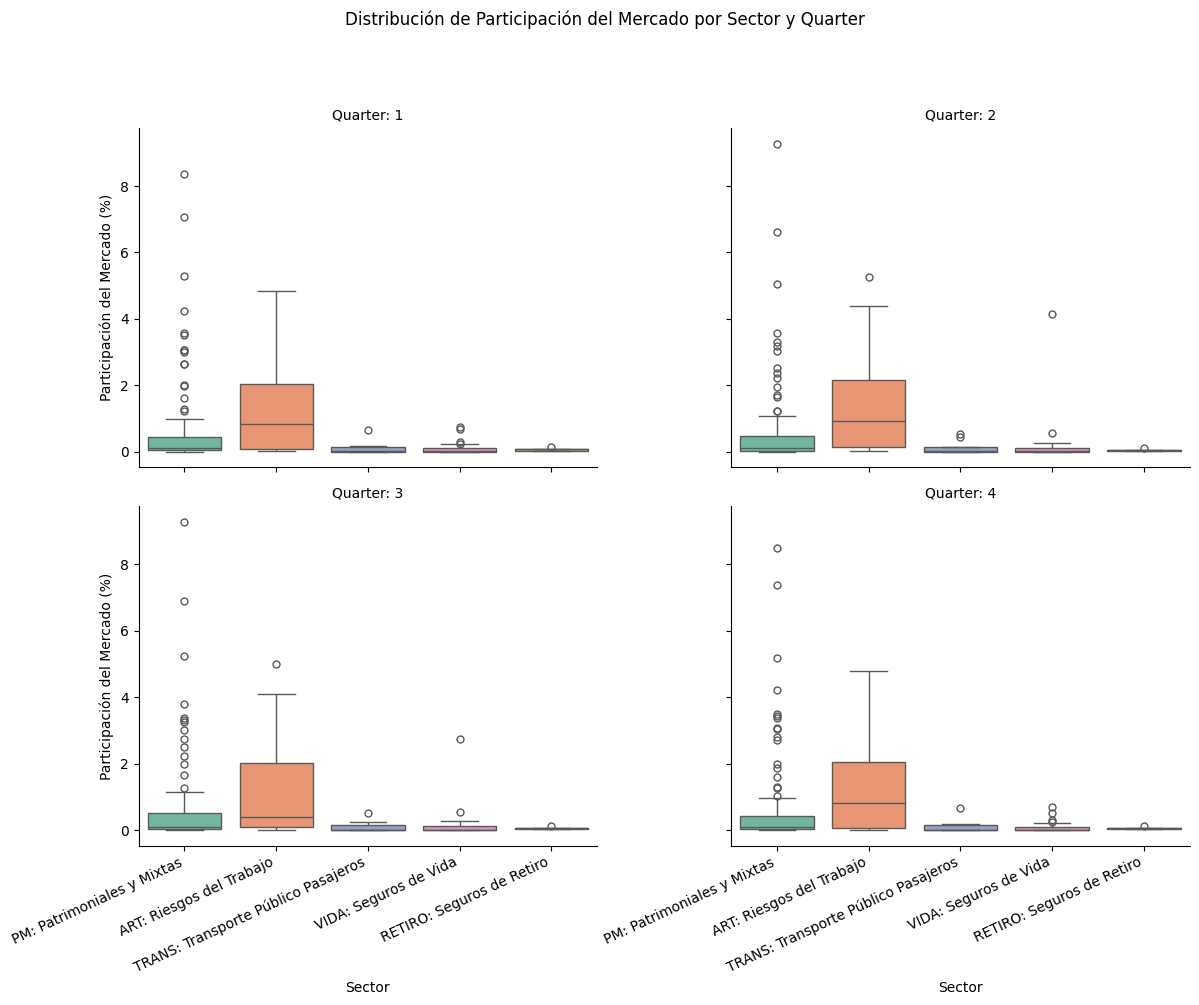

In [18]:
g = sns.catplot(
    x='Sector',
    y='A_rec',
    data=data,
    col='Quarter',
    kind='box',
    palette='Set2',
    col_wrap=2,
    height=5,
    aspect=1.2,
    sharey=True,
    order=mapeo_sectores.keys() # Usar las claves para el orden
)

# Establecer un título general
g.fig.suptitle('Distribución de Participación del Mercado por Sector y Quarter', y=1.03)

# Ajustar etiquetas de los ejes
g.set_axis_labels('Sector', 'Participación del Mercado (%)')

# Ajustar los títulos de cada subgráfico
g.set_titles("Quarter: {col_name}")

# --- BUCLE CORREGIDO ---
# Rotar las etiquetas del eje X en cada subgráfico y usar los nombres de mapeo_sectores
for ax in g.axes.flat:
    if len(ax.get_xticks()) > 0:
        # Asegúrate de que los valores de mapeo_sectores se usen como etiquetas
        ax.set_xticklabels(mapeo_sectores.values(), rotation=25, ha='right')
# --- FIN DEL BUCLE CORREGIDO ---

# Ajustar el layout
plt.tight_layout(rect=[0, 0.03, 1, 0.98])

# Mostrar el gráfico
plt.show()

*  No se observan diferencias significativas en los quarters. Se visualiza cambios suaves en meias de ART, y PM. Y persistencia de tendencias en cantidad de outliers por sector.



> Cantidad de Juicios en Tramite.

<ipython-input-19-f7ea39532b7d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Sector', y='B', data=data,


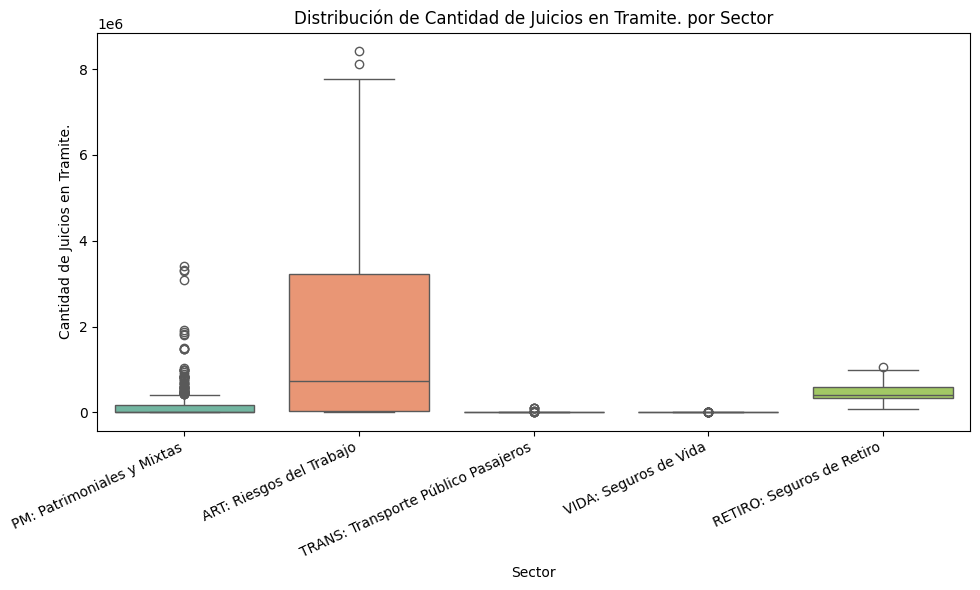

In [19]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Sector', y='B', data=data,
            palette='Set2')
plt.title('Distribución de Cantidad de Juicios en Tramite. por Sector')
plt.xlabel('Sector')
plt.ylabel('Cantidad de Juicios en Tramite.')
plt.xticks(ticks=range(len(mapeo_sectores)), labels=mapeo_sectores.values(), rotation=25, ha='right')
plt.tight_layout()
plt.show()

*    Dado el sesgo significativo en ART para realiza una mejor compracion en los sectores se convierte la columna B en escala logartimica


In [20]:
data['B_log'] = np.log1p(data['B'])
data['B_log']

0         8.2943
1      13.208359
2       8.936035
3      12.510247
4      12.296375
         ...    
758     8.071219
759          0.0
760     7.438972
761          0.0
762          0.0
Name: B_log, Length: 763, dtype: Float64

<ipython-input-21-063d2668a06f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Sector', y='B_log', data=data,


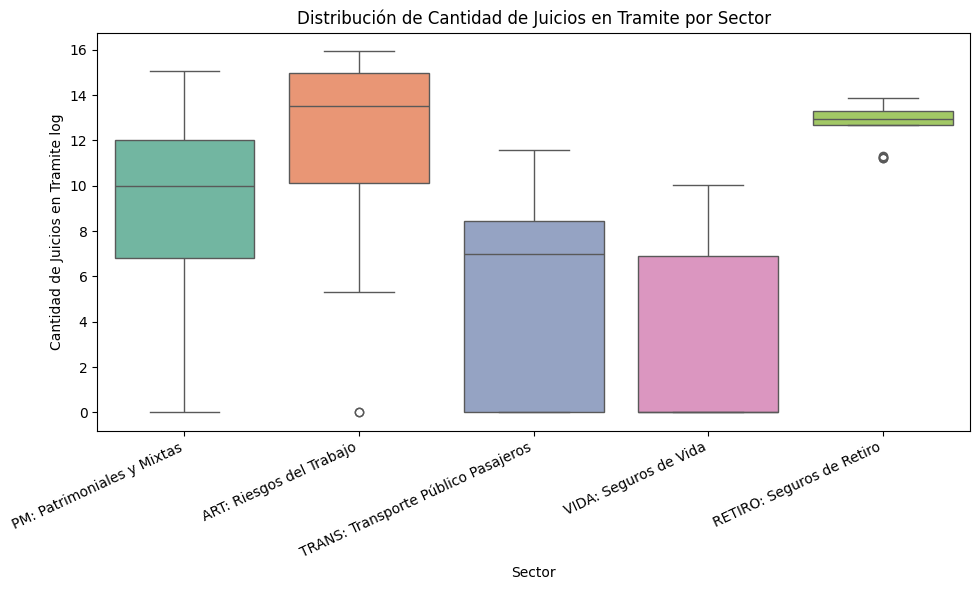

In [21]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Sector', y='B_log', data=data,
            palette='Set2')
plt.title('Distribución de Cantidad de Juicios en Tramite por Sector')
plt.xlabel('Sector')
plt.ylabel('Cantidad de Juicios en Tramite log')
plt.xticks(ticks=range(len(mapeo_sectores)), labels=mapeo_sectores.values(), rotation=25, ha='right')
plt.tight_layout()
plt.show()

*  Cada sector tiene su propia distribución visible en esta escala logarítmica (que va de 0 a ~23).
*   El sector ART sigue mostrando la mediana más alta (alrededor de 18 en la escala logarítmica) y una caja amplia, indicando que, incluso en escala logarítmica, tiende a tener los valores más altos y con bastante variabilidad.
*  RETIRO ahora muestra una mediana casi tan alta como ART (alrededor de 17.5), pero su caja es extremadamente compacta. Esto sugiere que la mayoría de las compañías de Retiro (en esta escala) tienen valores muy similares y altos. También tiene varios outliers, tanto altos como bajos, lo que indica que hay excepciones notables.
*  Patrimoniales y Mixtas (PM) se sitúa en una posición intermedia, con una mediana alrededor de 12.5 y una variabilidad considerable (caja bastante ancha).

<ipython-input-22-a4ec1454fa35>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(
<ipython-input-22-a4ec1454fa35>:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(mapeo_sectores.values(), rotation=25, ha='right')
<ipython-input-22-a4ec1454fa35>:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(mapeo_sectores.values(), rotation=25, ha='right')
<ipython-input-22-a4ec1454fa35>:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(mapeo_sectores.values(), rotation=25, ha='right')
<ipython-input-22-a4ec1454fa35>:28: UserWarning: set_tickl

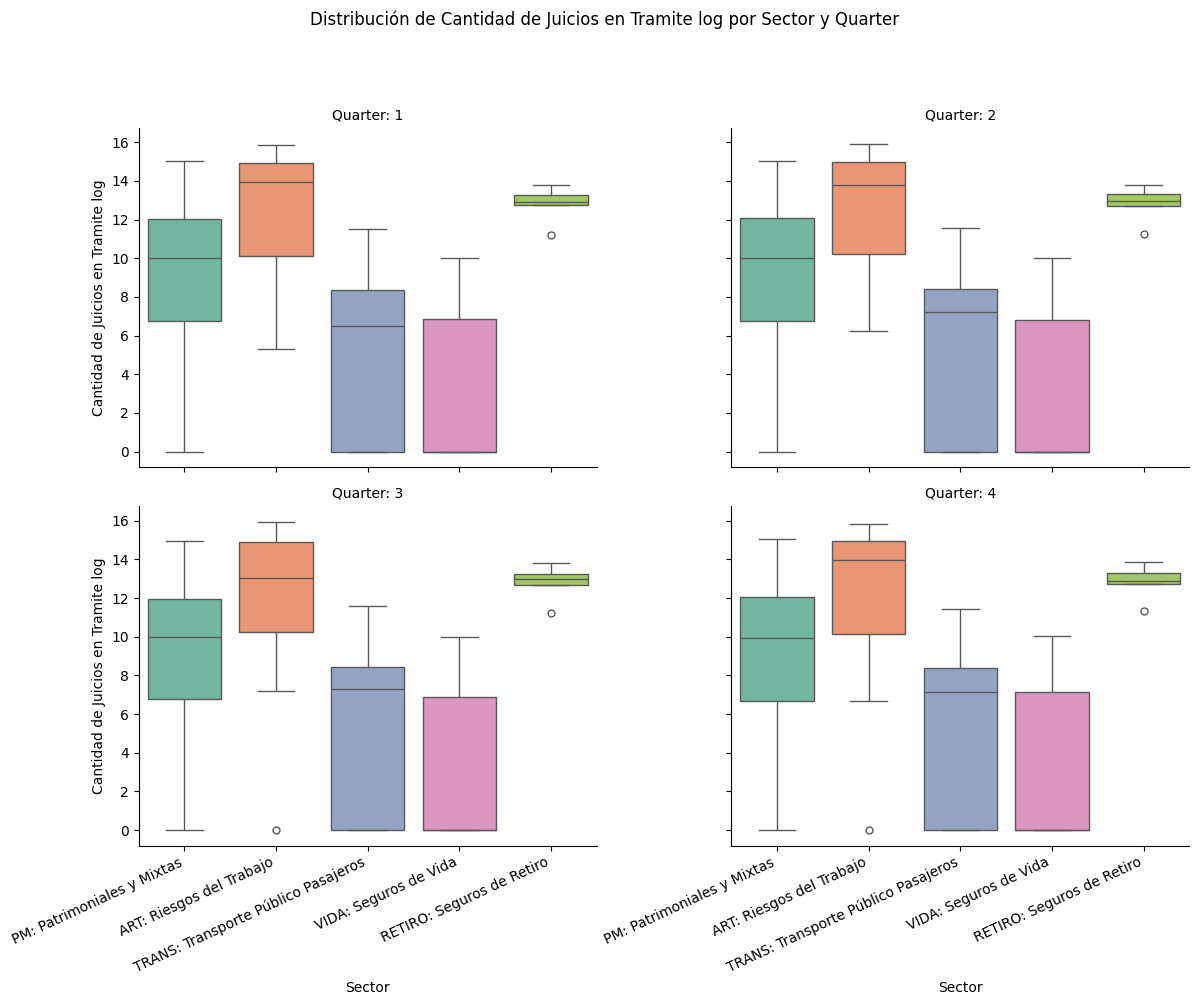

In [22]:
g = sns.catplot(
    x='Sector',
    y='B_log',
    data=data,
    col='Quarter',
    kind='box',
    palette='Set2',
    col_wrap=2,
    height=5,
    aspect=1.2,
    sharey=True,
    order=mapeo_sectores.keys() # Usar las claves para el orden
)

# Establecer un título general
g.fig.suptitle('Distribución de Cantidad de Juicios en Tramite log por Sector y Quarter', y=1.03)

# Ajustar etiquetas de los ejes
g.set_axis_labels('Sector', 'Cantidad de Juicios en Tramite log')

# Ajustar los títulos de cada subgráfico
g.set_titles("Quarter: {col_name}")

# --- BUCLE CORREGIDO ---
# Rotar las etiquetas del eje X en cada subgráfico y usar los nombres de mapeo_sectores
for ax in g.axes.flat:
    if len(ax.get_xticks()) > 0:
        ax.set_xticklabels(mapeo_sectores.values(), rotation=25, ha='right')
# --- FIN DEL BUCLE CORREGIDO ---

# Ajustar el layout
plt.tight_layout(rect=[0, 0.03, 1, 0.98])

# Mostrar el gráfico
plt.show()

*  No se observan cambios significativos por mes salvo cambio en media como en transporte de pasajeros o retiro

> Dispersion de participacion en el mercado y Cantidad de Juicios en Tramite. etiquetador pos sector

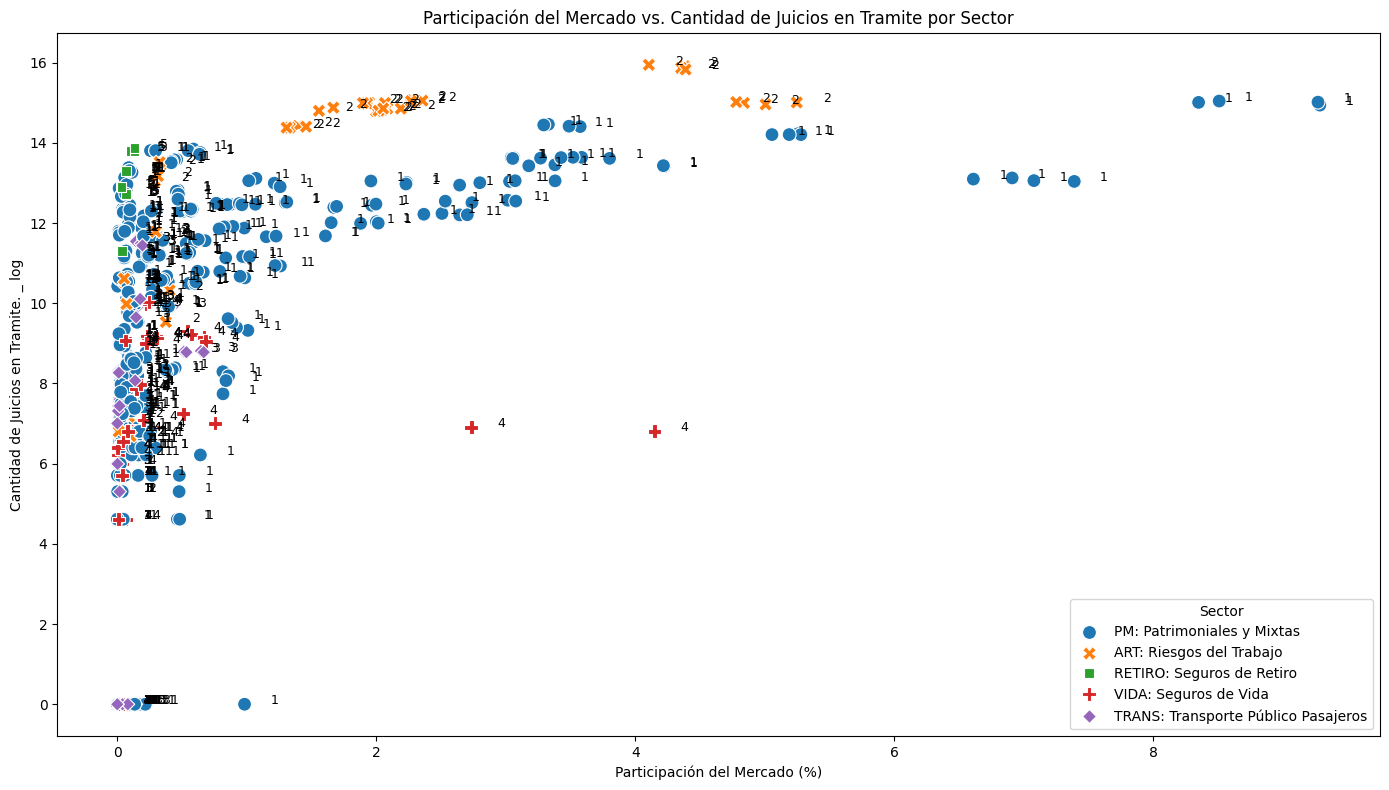

In [23]:
data['Sector_Nombre'] = data['Sector'].map(mapeo_sectores) #Para asignar nombre en el gráfico
plt.figure(figsize=(14, 8))
sns.scatterplot(x='A_rec',
                y='B_log',
                data=data,
                hue='Sector_Nombre',
                style='Sector_Nombre',
                s=100)

for i in range(len(data)):
    plt.text(x=data['A_rec'].iloc[i]+ 0.2,  # Pequeño desplazamiento para legibilidad Si hay muchos puntos cercanos, las etiquetas pueden solaparse.
             y=data['B_log'].iloc[i],
             s=data['Sector'].iloc[i],
             fontsize=9)

plt.title('Participación del Mercado vs. Cantidad de Juicios en Tramite por Sector')
plt.xlabel('Participación del Mercado (%)')
plt.ylabel('Cantidad de Juicios en Tramite. _ log')
plt.legend(title='Sector', loc='lower right')  # Mover la leyenda fuera del gráfico , bbox_to_anchor=(1.05, 1)
plt.tight_layout()
plt.show()


*  PM: Es el grupo más disperso en participación (A), llegando a los valores más altos. En siniestros (log), se mueven en la zona media-alta (B_log aprox 10-18), aunque hay un grupo notable más abajo (aprox 0-5). Se visualiza su gran participacio en el mercado dado que hay gran cantidad de marcas.

*   ART: Ocupan la franja superior del gráfico (B_log entre ~18 y ~23). Tienen los siniestros (log) más altos, pero su participación de mercado es relativamente baja (mayormente < 4%).

*  RETIRO: Se agrupan en la parte alta-izquierda (B_log ~17-18), pero con una participación de mercado muy baja (< 1%). Son "altos en siniestros, bajos en mercado". Se podría considerarse un "nicho".

*  VIDA : En la zona media-izquierda (B_log entre 5 y 9 puntos aprox) y con muy baja participación.

*  TRANS (Púrpura Diamante, '3'): También en la zona baja-izquierda, quizás un poco por encima de VIDA en siniestros (B_log ~0-10), y con participación extremadamente baja.


## 2.3 Exploracion de outliers para participacion en el mercado menor al 0,01%

In [24]:
data_bpm = data[data['A_rec'] < 0.0001] #baja participacion del mercado
data_bpm

Entidad  NJ  Denominación  Sector  Quarter    A     B  \
34        35   2            66       1        3  0.0     0   
41        42   1            76       1        3  0.0     0   
60        61   1           115       1        3  0.0     0   
63        64   1           119       1        3  0.0     0   
74        75   2           136       1        3  0.0     0   
116      117   1           241       1        3  0.0   200   
130       10   1           162       2        3  0.0     0   
142        2   1            15       4        3  0.0     0   
184       11   1           184       3        3  0.0  1100   
188       15   1           221       3        3  0.0     0   
189       16   1           246       3        3  0.0     0   
198        9   2            18       1        2  0.0     0   
214       25   1            49       1        2  0.0   100   
227       38   2            66       1        2  0.0     0   
232       43   1            76       1        2  0.0     0   
256       67   1           119       1        2  0.0     0   
300      111   2           225       1        2  0.0     0   
308      119   1           241       1        2  0.0   300   
374       11   1           184       3        2  0.0  1100   
378       15   1           221       3        2  0.0     0   
379       16   1           246       3        2  0.0     0   
423       44   1            76       1        1  0.0     0   
446       67   1           119       1        1  0.0     0   
499      120   1           241       1        1  0.0   100   
524        2   1            15       4        1  0.0     0   
537       15   1           151       4        1  0.0     0   
565       11   1           184       3        1  0.0  1100   
569       15   1           221       3        1  0.0     0   
570       16   1           246       3        1  0.0   100   
597       27   1            49       1        4  0.0   300   
602       32   1            55       1        4  0.0     0   
615       45   1            76       1        4  0.0     0   
638       68   1           119       1        4  0.0     0   
654       84   1           150       1        4  0.0     0   
691      121   1           241       1        4  0.0   100   
716        2   1            13       4        4  0.0     0   
729       15   1           151       4        4  0.0     0   
757       11   1           184       3        4  0.0  1100   
761       15   1           221       3        4  0.0     0   
762       16   1           246       3        4  0.0     0   

     A- Disponibilidades  A- Inversiones  A- Creditos  ...  RF -  TOTAL  \
34            2661928.06      7307054.71   6327701.86  ...   2204027.95   
41                334.08       601178.49     88411.55  ...      1425.86   
60               7199.71       336902.71     63521.40  ...      5358.31   
63              28803.96       414226.41     11018.22  ...     35947.46   
74             101901.72      5988696.32     71704.13  ...     99221.80   
116                15.00        35160.37      3690.39  ...      1327.36   
130              2090.49      2146130.00      4009.57  ...    132985.26   
142              3500.57       136966.26      2854.57  ...     26136.93   
184              6700.37     18769195.44     13089.69  ...   1054065.34   
188             99657.07      1711579.85     17337.29  ...     14079.35   
189             16791.51      1434129.60    101164.66  ...     78093.68   
198            103814.08      5619429.35    184364.07  ...    156824.79   
214              1655.07         1309.26   1757507.07  ...     45239.15   
227           2449834.22      8720546.68   5765534.37  ...   1318324.25   
232             39160.04       529148.00     69986.99  ...     11114.42   
256             24755.90       336258.76     14184.92  ...      9720.28   
300              4440.49       500196.79     73761.80  ...     71728.32   
308                15.00        30006.88     10412.18  ...      4912.16   
374              8423.86     14238729

*  40 compañia que representan aproximadamente el 5% de la muestra, si tiene baja participacion del mercado indica bajo ingresos lo que es posible que se geenre un error al calcular el ratio generando valores extremos (outliers) o valores que no se pueden calcular como divido por 0.

<ipython-input-25-61bd063bd65a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Sector', y='B_log', data=data_bpm,


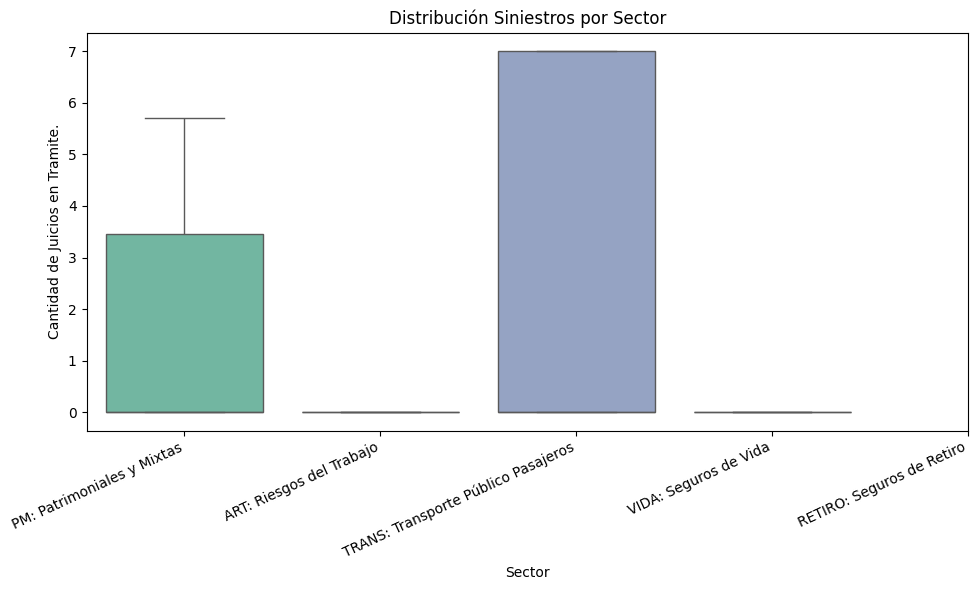

In [25]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Sector', y='B_log', data=data_bpm,
            palette='Set2')
plt.title('Distribución Siniestros por Sector')
plt.xlabel('Sector')
plt.ylabel('Cantidad de Juicios en Tramite.')
plt.xticks(ticks=range(len(mapeo_sectores)), labels=mapeo_sectores.values(), rotation=25, ha='right')
plt.tight_layout()
plt.show()

*  

In [26]:
data = data[data['A_rec'] >= 0.0001] .reset_index()
 #resto participacion del mercado
data

index  Entidad  NJ  Denominación  Sector  Quarter     A       B  \
0        0        1   1             1       1        3  0.09    4000   
1        1        2   2             2       1        3  0.08  544900   
2        2        3   1             3       1        3  0.05    7600   
3        3        4   1             4       1        3  2.74  271100   
4        4        5   1             7       1        3  0.04  218900   
..     ...      ...  ..           ...     ...      ...   ...     ...   
718    755        9   1           158       3        4  0.19   93100   
719    756       10   1           169       3        4  0.04       0   
720    758       12   1           194       3        4  0.14    3200   
721    759       13   1           207       3        4  0.08       0   
722    760       14   1           214       3        4  0.02    1700   

     A- Disponibilidades  A- Inversiones  ...   RF -  TOTAL  \
0              322285.32    5.255642e+06  ...  6.545204e+04   
1             4238758.68    7.830170e+07  ...  1.843412e+05   
2              246204.11    3.210142e+06  ...  7.644231e+05   
3            14423748.50    3.148950e+08  ...  2.197546e+07   
4              285568.23    8.606103e+05  ...  4.701028e+06   
..                   ...             ...  ...           ...   
718           1406292.24    6.143620e+08  ...  5.631960e+08   
719             15913.55    8.290746e+06  ...  3.903527e+05   
720           1259328.14    1.040833e+08  ...  7.383095e+05   
721            244913.96    7.691014e+07  ...  2.578031e+06   
722            322953.61    5.573159e+07  ...  1.803977e+05   

     RF -  ResultadoOperacionesOrdinarias  \
0                               858047.70   
1                             14664919.24   
2                               463405.14   
3                             18120755.79   
4                              5721826.96   
..                                    ...   
718                            2174957.71   
719                             782985.04   
720                            4204862.37   
721                            1893958.51   
722                            2713877.21   

     RF -  Resultado OperacionesExtraordinarias  RF -  Impuestoa lasGanancias  \
0                                           0.0                     208830.67   
1                                           0.0                          0.00   
2                                           0.0                      69993.51   
3                                           0.0                    5402294.35   
4                                           0.0                          0.00   
..                                          ...                           ...   
718                                         0.0                    3181074.81   
719                                         0.0                      32410.78   
720                                         0.0                    2003554.45   
721                                         0.0                     315140.13   
722                                         0.0                      87965.88   

     RF -  RESULTADODELEJERCICIO  top  Total_Trimestral     A_rec      B_log  \
0                      649217.03    4      8.433989e+09  0.086393     8.2943   
1                    14664919.24    4      8.433989e+09  0.082152  13.208359   
2                      533398.64    4      8.433989e+09  0.046357   8.936035   
3                    12718461.44    2      8.433989e+09  2.738927  12.510247   
4                     5721826.96    4      8.433989e+09  0.039326  12.296375   
..                           ...  ...               ...       ...        ...   
718                   1006117.10    4      8.424972e+09  0.194205   11.44144   
719                    815395.82    4      8.424972e+09  0.039748        0.0   
720                   2201307.92    4      8.424972e+09  0.138052   8.071219   
721                   2209098.64    4      8.424972e+09  0.081142    

<ipython-input-27-7ecde487d018>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Sector', y='B_log', data=data,


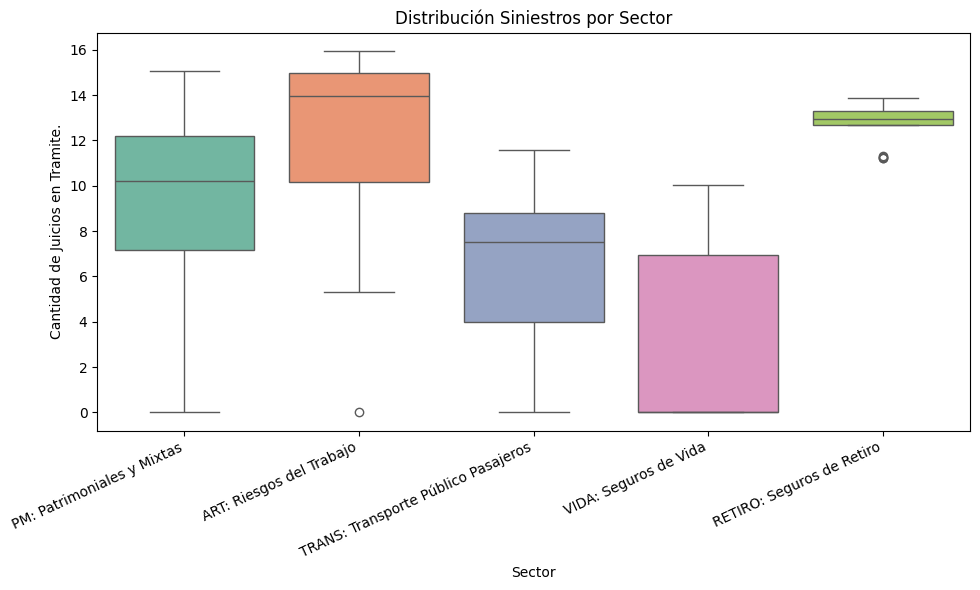

In [27]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Sector', y='B_log', data=data,
            palette='Set2')
plt.title('Distribución Siniestros por Sector')
plt.xlabel('Sector')
plt.ylabel('Cantidad de Juicios en Tramite.')
plt.xticks(ticks=range(len(mapeo_sectores)), labels=mapeo_sectores.values(), rotation=25, ha='right')
plt.tight_layout()
plt.show()

* la eliminacion no generó una diferencia significativa del volumen de siniestros por sector que es el mayor determinante.

In [28]:
data = data.drop('Sector_Nombre', axis=1) #Para eliminar la columna usada para el gráfico

##  2.4 Correlaciones con el activo

> Correlacion de
*   Sector,
*   A - participacion del mercado,
*   B- Cantidad de siniestos ,
*   A- Disponibilidades,
*   A- Inversiones,
*   A- Creditos,
*   A- Inmuebles,
*   A- Bienes de Uso,
*   A- Otros,


In [29]:
columnas_activo= ['NJ','Quarter','Sector',
    'A_rec',
    'B_log',
    'A- Disponibilidades',
    'A- Inversiones',
    'A- Creditos',
    'A- Inmuebles',
    'A- Bienes de Uso',
    'A- Otros',
    'SD - SiniestrosPagados',
    'SD -  PrimasEmitidas'
]

In [30]:
matrix = data[columnas_activo].corr()
matrix

NJ   Quarter    Sector     A_rec     B_log  \
NJ                      1.000000  0.002754  0.019634  0.050988  0.033851   
Quarter                 0.002754  1.000000  0.002859  0.001956  0.009543   
Sector                  0.019634  0.002859  1.000000 -0.168744 -0.329960   
A_rec                   0.050988  0.001956 -0.168744  1.000000  0.438218   
B_log                   0.033851  0.009543 -0.329960  0.438218  1.000000   
A- Disponibilidades     0.149996 -0.004022 -0.102873  0.716680  0.269679   
A- Inversiones          0.080215 -0.011241  0.048521  0.741112  0.312600   
A- Creditos             0.071493 -0.003973 -0.207877  0.904426  0.402990   
A- Inmuebles            0.247301 -0.005896 -0.114823  0.473808  0.267362   
A- Bienes de Uso        0.135920 -0.007909 -0.194912  0.748665  0.359762   
A- Otros                0.100700 -0.001850 -0.083407  0.540750  0.155709   
SD - SiniestrosPagados  0.021449 -0.044630 -0.128040  0.878256  0.394338   
SD -  PrimasEmitidas    0.040911 -0.048057 -0.160821  0.923294  0.408607   

                        A- Disponibilidades  A- Inversiones  A- Creditos  \
NJ                                 0.149996        0.080215     0.071493   
Quarter                           -0.004022       -0.011241    -0.003973   
Sector                            -0.102873        0.048521    -0.207877   
A_rec                              0.716680        0.741112     0.904426   
B_log                              0.269679        0.312600     0.402990   
A- Disponibilidades                1.000000        0.624683     0.639615   
A- Inversiones                     0.624683        1.000000     0.640300   
A- Creditos                        0.639615        0.640300     1.000000   
A- Inmuebles                       0.397185        0.274744     0.492104   
A- Bienes de Uso                   0.426535        0.459234     0.751264   
A- Otros                           0.403124        0.230352     0.623190   
SD - SiniestrosPagados             0.613003        0.645044     0.742485   
SD -  PrimasEmitidas               0.637783        0.665759     0.823309   

                        A- Inmuebles  A- Bienes de Uso  A- Otros  \
NJ                          0.247301          0.135920  0.100700   
Quarter                    -0.005896         -0.007909 -0.001850   
Sector                     -0.114823         -0.194912 -0.083407   
A_rec                       0.473808          0.748665  0.540750   
B_log                       0.267362          0.359762  0.155709   
A- Disponibilidades         0.397185          0.426535  0.403124   
A- Inversiones              0.274744          0.459234  0.230352   
A- Creditos                 0.492104          0.751264  0.623190   
A- Inmuebles                1.000000          0.419156  0.723002   
A- Bienes de Uso            0.419156          1.000000  0.578269   
A- Otros                    0.723002          0.578269  1.000000   
SD - SiniestrosPagados      0.305380          0.621749  0.387674   
SD -  PrimasEmitidas        0.426644          0.686783  0.495680   

                        SD - SiniestrosPagados  SD -  PrimasEmitidas  
NJ                                    0.021449              0.040911  
Quarter                              -0.044630             -0.048057  
Sector                               -0.128040             -0.160821  
A_rec                                 0.878256              0.923294  
B_log                                 0.394338              0.408607  
A- Disponibilidades                   0.613003              0.637783  
A- Inversiones                        0.645044              0.665759  
A- Creditos                           0.742485              0.823309  
A- Inmuebles                          0.305380              0.426644  
A- Bienes de Uso                      0.621749              0.686783  
A- Otros                              0.387674              0.495680  
SD - SiniestrosPagados                1.000000              0.956038  
SD -  PrimasEmitidas    

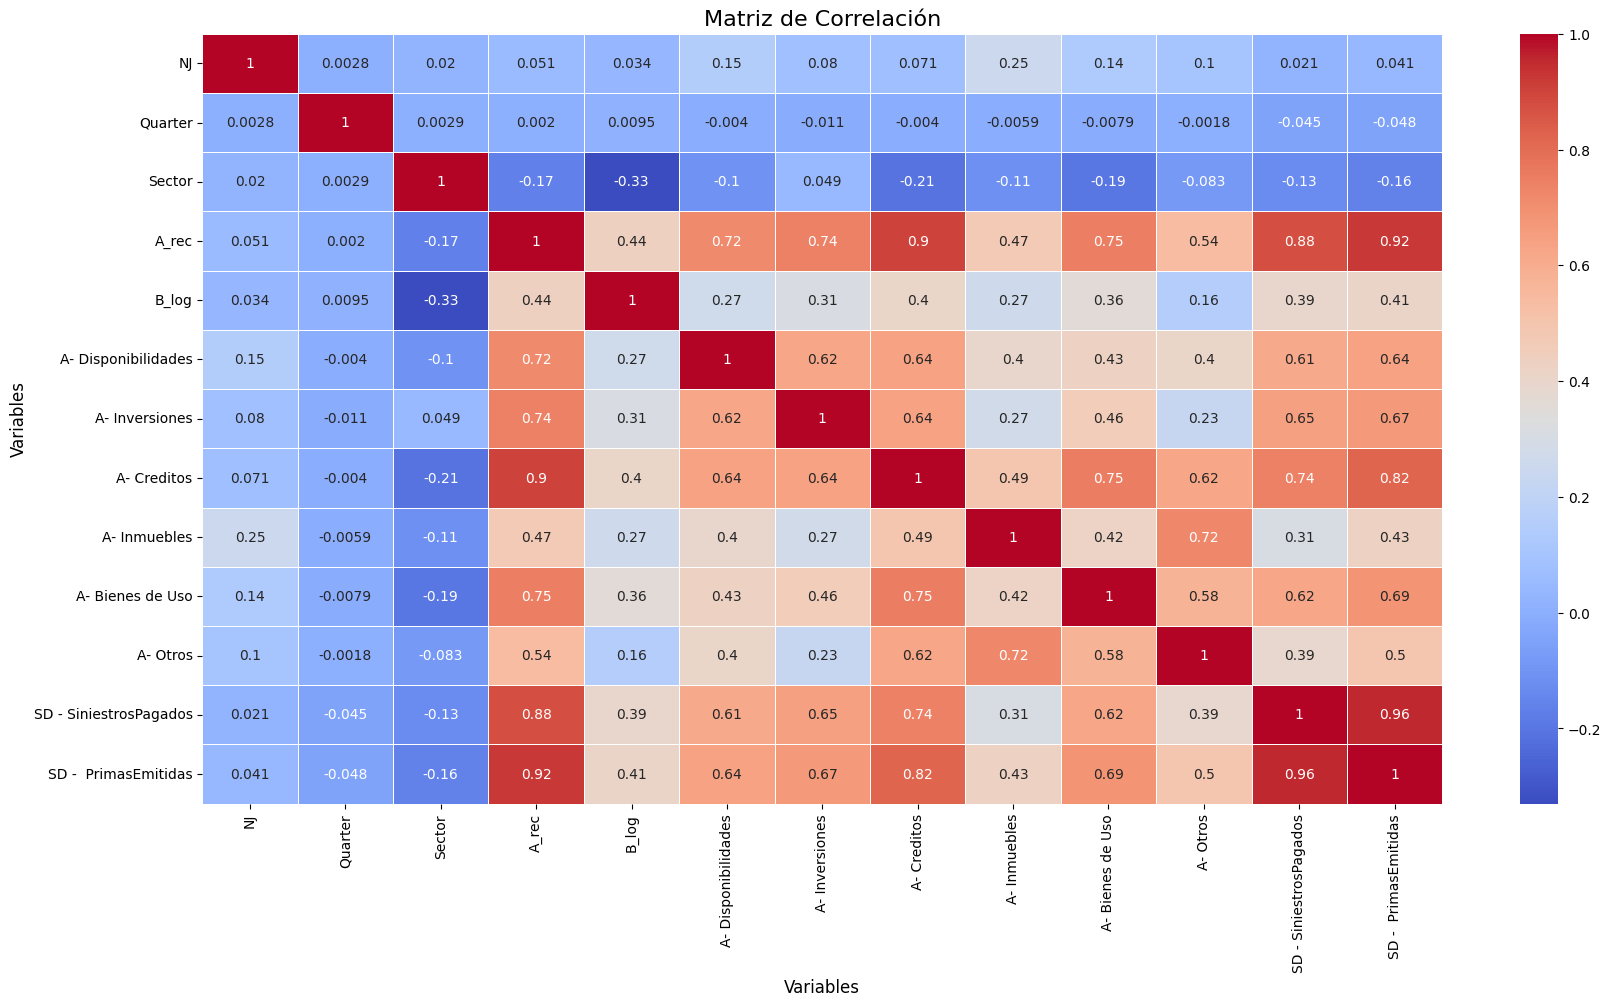

In [31]:
f, ax = plt.subplots(figsize=(20,10))
sns.heatmap(matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlación', fontsize=16)
plt.xlabel('Variables', fontsize=12)
plt.ylabel('Variables', fontsize=12)
plt.show()

*  El tamaño se relaciona fuertemente a la estructura que es el activo, especialmente con los activos corrientes indicando gran liquidez por parte de las compañias
*  SiniestrosPagados tiene una fuerte relacion con créditos - puede estar vinculado con deudas con asegurados - pero este ultimo esta en el pasivo.

## 2.4 Correlaciones con el pasivo y PN

In [32]:
columnas_pasivo_pn= ['NJ','Quarter','Sector',
    'A_rec',
    'B_log',
    'P- Deudas c/Asegurados',
    'P- Otras Deudas',
    'P- Compromisos Tecnicos',
    'P- Previsiones', 'PATRIMONIO NETO ',    'SD - SiniestrosPagados',
    'SD -  PrimasEmitidas'
]

In [33]:
matrix = data[columnas_pasivo_pn].corr()
matrix

NJ   Quarter    Sector     A_rec     B_log  \
NJ                       1.000000  0.002754  0.019634  0.050988  0.033851   
Quarter                  0.002754  1.000000  0.002859  0.001956  0.009543   
Sector                   0.019634  0.002859  1.000000 -0.168744 -0.329960   
A_rec                    0.050988  0.001956 -0.168744  1.000000  0.438218   
B_log                    0.033851  0.009543 -0.329960  0.438218  1.000000   
P- Deudas c/Asegurados  -0.020338 -0.014739 -0.107749  0.863092  0.402347   
P- Otras Deudas          0.018973  0.008623 -0.188692  0.858833  0.422167   
P- Compromisos Tecnicos  0.139486 -0.004871  0.191920  0.209293  0.076175   
P- Previsiones          -0.028041 -0.000553 -0.044308  0.486296  0.114826   
PATRIMONIO NETO          0.147511 -0.010942 -0.137355  0.860989  0.370184   
SD - SiniestrosPagados   0.021449 -0.044630 -0.128040  0.878256  0.394338   
SD -  PrimasEmitidas     0.040911 -0.048057 -0.160821  0.923294  0.408607   

                         P- Deudas c/Asegurados  P- Otras Deudas  \
NJ                                    -0.020338         0.018973   
Quarter                               -0.014739         0.008623   
Sector                                -0.107749        -0.188692   
A_rec                                  0.863092         0.858833   
B_log                                  0.402347         0.422167   
P- Deudas c/Asegurados                 1.000000         0.667385   
P- Otras Deudas                        0.667385         1.000000   
P- Compromisos Tecnicos                0.075434         0.223007   
P- Previsiones                         0.545131         0.271928   
PATRIMONIO NETO                        0.679876         0.813091   
SD - SiniestrosPagados                 0.840816         0.665180   
SD -  PrimasEmitidas                   0.778667         0.780036   

                         P- Compromisos Tecnicos  P- Previsiones  \
NJ                                      0.139486       -0.028041   
Quarter                                -0.004871       -0.000553   
Sector                                  0.191920       -0.044308   
A_rec                                   0.209293        0.486296   
B_log                                   0.076175        0.114826   
P- Deudas c/Asegurados                  0.075434        0.545131   
P- Otras Deudas                         0.223007        0.271928   
P- Compromisos Tecnicos                 1.000000        0.118059   
P- Previsiones                          0.118059        1.000000   
PATRIMONIO NETO                         0.237357        0.468180   
SD - SiniestrosPagados                  0.072725        0.554784   
SD -  PrimasEmitidas                    0.168378        0.469415   

                         PATRIMONIO NETO   SD - SiniestrosPagados  \
NJ                               0.147511                0.021449   
Quarter                         -0.010942               -0.044630   
Sector                          -0.137355               -0.128040   
A_rec                            0.860989                0.878256   
B_log                            0.370184                0.394338   
P- Deudas c/Asegurados           0.679876                0.840816   
P- Otras Deudas                  0.813091                0.665180   
P- Compromisos Tecnicos          0.237357                0.072725   
P- Previsiones                   0.468180                0.554784   
PATRIMONIO NETO                  1.000000                0.720066   
SD - SiniestrosPagados           0.720066                1.000000   
SD -  PrimasEmitidas             0.790581                0.956038   

                         SD -  PrimasEmitidas  
NJ                                   0.040911  
Quarter                             -0.048057  
Sector                              -0.160821  
A_rec                                0.923294  
B_log                                0.408607  
P- Deudas c/Asegurados               0.778667  
P- Otras Deudas          

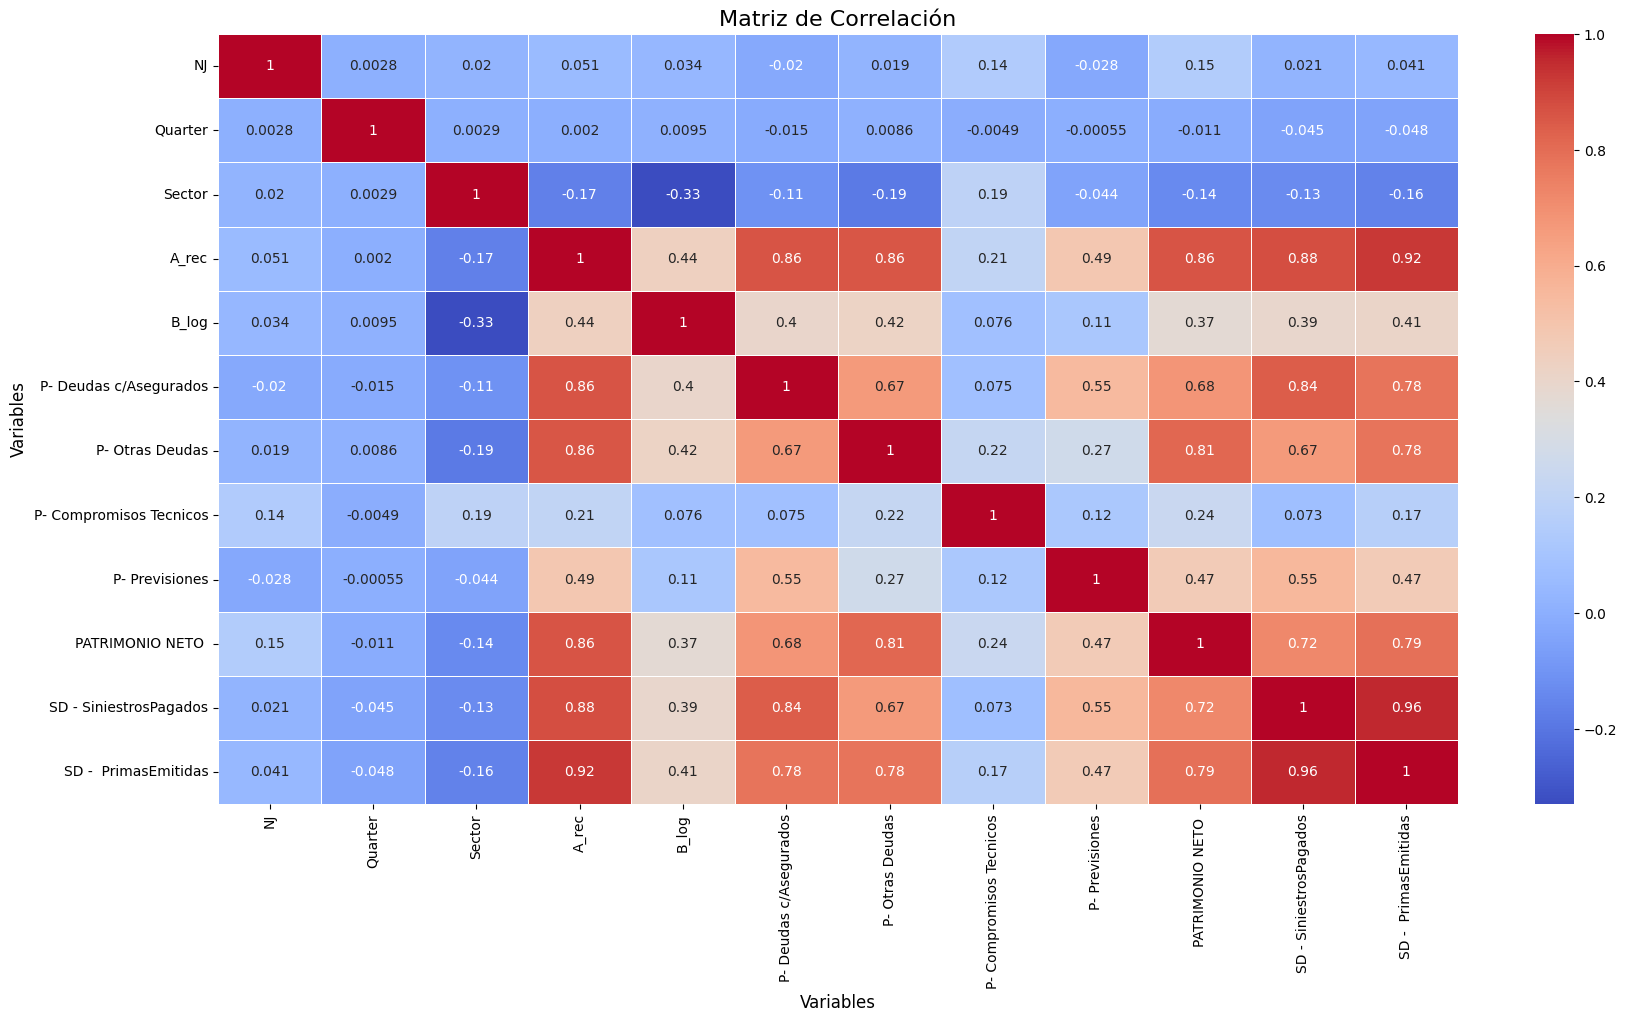

In [34]:
f, ax = plt.subplots(figsize=(20,10))
sns.heatmap(matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlación', fontsize=16)
plt.xlabel('Variables', fontsize=12)
plt.ylabel('Variables', fontsize=12)
plt.show()

*  Misma observacion tamaño con estructuras,
*  Siniestros pagados fuerte relacion con deudas cona asegurados, esperable y en menor medida con compromisos tecnicos
*  Primas emitidas tambien guarda fuerte relacion inversa con deudas con asgeurdos como se ve con siniestros en el activo y créditos. Lo que sugiere grandes emisiones llevan a grandes volumenes de siniestros pagados.

# 3- Creación de nuevas variables

Si lo considera oportuno para el problema planteado puede crear nuevas variables justificando los motivos.

> Se crea el indice de loss ratio
 SD - SiniestrosPagados   / SD - PrimasEmitidas

In [35]:
data['Loss_ratio'] = np.where(
    data['SD -  PrimasEmitidas'] != 0,  # Condición: divisor no es 0
    data['SD - SiniestrosPagados'] / data['SD -  PrimasEmitidas'],  # División si la condición se cumple
    np.nan  # Si el divisor es 0, asignamos NaN
)

In [36]:
data[['Sector','SD - SiniestrosPagados', 'SD - ResultadoTecnico deSegurosDirectos', 'Loss_ratio']]


Sector  SD - SiniestrosPagados  SD - ResultadoTecnico deSegurosDirectos  \
0         1            6.770150e+05                                536942.86   
1         1            5.254696e+06                              14480578.06   
2         1            3.789958e+05                                311168.58   
3         1            1.171527e+08                               2606784.05   
4         1            1.323124e+06                               1020798.69   
..      ...                     ...                                      ...   
718       3            0.000000e+00                              32337140.06   
719       3            0.000000e+00                                 66070.74   
720       3            8.667683e+04                              81312879.09   
721       3            0.000000e+00                                430170.45   
722       3            0.000000e+00                               2974870.95   

     Loss_ratio  
0      0.092915  
1      0.758392  
2      0.096936  
3      0.507153  
4      0.398924  
..          ...  
718    0.000000  
719    0.000000  
720    0.007452  
721    0.000000  
722    0.000000  

[723 rows x 4 columns]

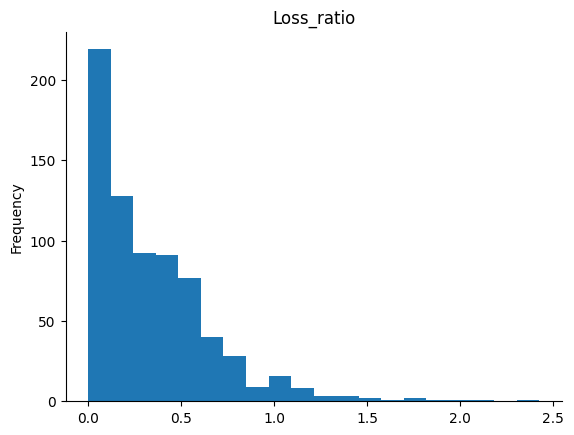

In [37]:
from matplotlib import pyplot as plt #mirar los valorss muy
data['Loss_ratio'].plot(kind='hist', bins=20, title='Loss_ratio')
plt.gca().spines[['top', 'right',]].set_visible(False)

*  Se observa una alta presencia de valores 0 y luego en disminucion escalonadamente de 250 a 130 aprox a 0,1, luego a 90 bajando graualmente hasta 50 y luego una baja significativa y de nuevo una pequeña alza lo que indicaria un grupo con valores apenas superiores a 1 (alta siniestralidad lo que es oportunidad de mejora)

<ipython-input-38-32485b24887d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Sector', y='Loss_ratio', data=data,


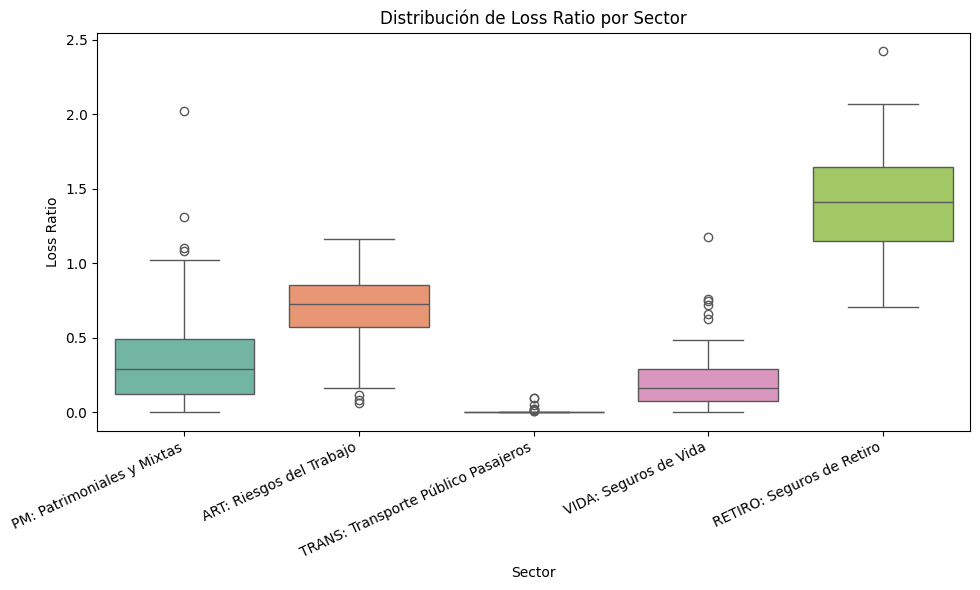

In [38]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Sector', y='Loss_ratio', data=data,
            palette='Set2')
plt.title('Distribución de Loss Ratio por Sector')
plt.xlabel('Sector')
plt.ylabel('Loss Ratio')
plt.xticks(ticks=range(len(mapeo_sectores)), labels=mapeo_sectores.values(), rotation=25, ha='right')
plt.tight_layout()
plt.show()

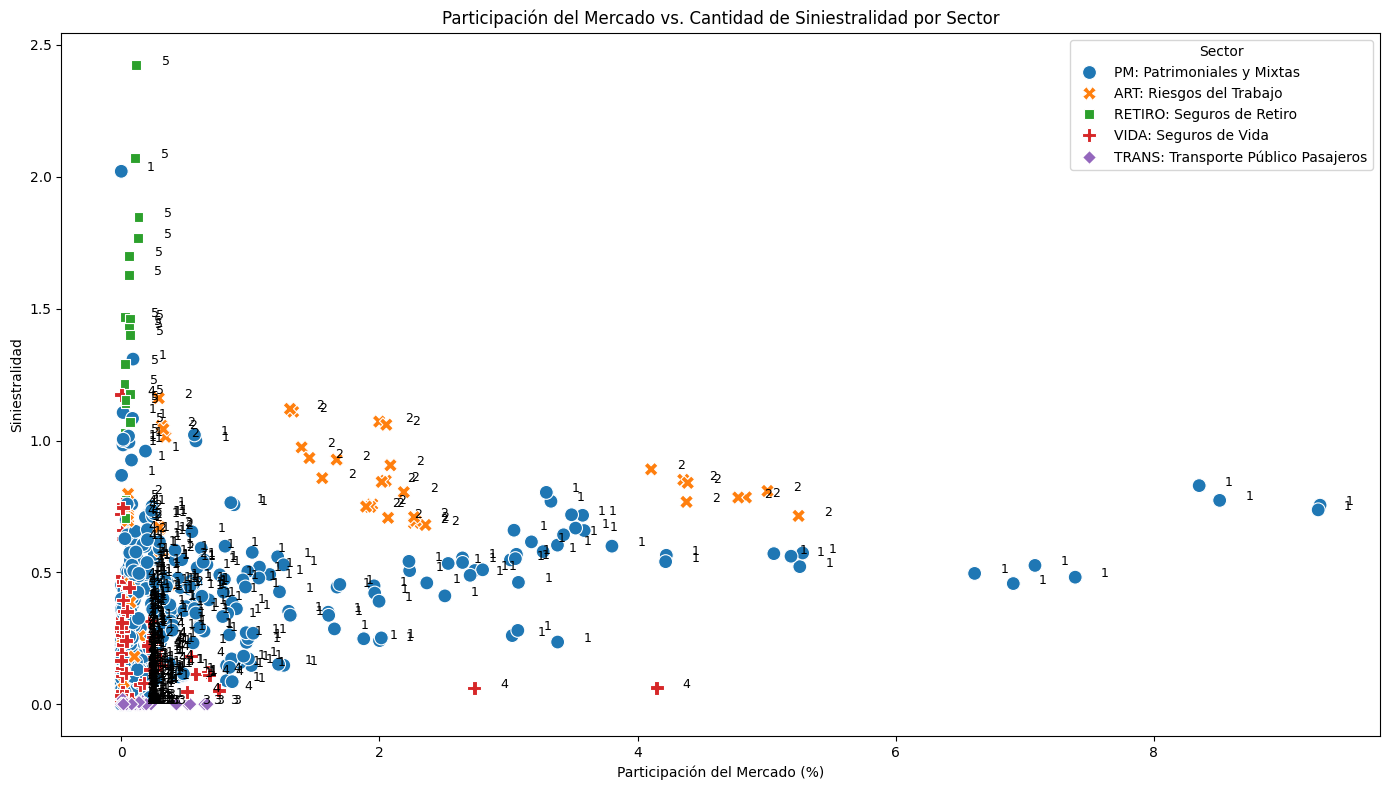

In [39]:
data['Sector_Nombre'] = data['Sector'].map(mapeo_sectores) #Para asignar nombre en el gráfico
plt.figure(figsize=(14, 8))
sns.scatterplot(x='A_rec',
                y='Loss_ratio',
                data=data,
                hue='Sector_Nombre',
                style='Sector_Nombre',
                s=100)

for i in range(len(data)):
    plt.text(x=data['A_rec'].iloc[i]+ 0.2,  # Pequeño desplazamiento para legibilidad Si hay muchos puntos cercanos, las etiquetas pueden solaparse.
             y=data['Loss_ratio'].iloc[i],
             s=data['Sector'].iloc[i],
             fontsize=9)

plt.title('Participación del Mercado vs. Cantidad de Siniestralidad por Sector')
plt.xlabel('Participación del Mercado (%)')
plt.ylabel('Siniestralidad')
plt.legend(title='Sector', loc='upper right')  # Mover la leyenda fuera del gráfico  bbox_to_anchor=(1.05, 1),
plt.tight_layout()
plt.show()

*  El sector de interes PM cuenta con una distribucion variada en participacion y siniestralidad teniendo casos de participacion alta (punto de interes) y bajo nivel de siniestralidad aprox 5% siniestralidad y 5% de participacion del mercado.
*  Se observa una baja siniestralidad en el sector transporte con una baja participacion en el mercado. Lo que puede sugerir que o 1) no sea un area que tenga mucho riesgo dado su poca participacion en el mercado o 2) un buen manejo de la siniestralidad.
*  El sector retiro si tiene altos niveles de siniestralidad lo que indica mala gestión o necesidad de compensación con otros ingresos por el tipo de negocio.

# 4- Reducción de la dimensionalidad

Si lo considera oportuno para el problema planteado puede aplicar PCA para reducir la dimensionalidad.

> Para mejorar el rendimiento y reducir ruidos de las 66 variables que conforman los Estados Contables  y de Situacion Patrimonial se pocedió a dividir en 4 áreas el set e ignorando las variables totales que se alimentan de la suma:
*  Activos
*  Pasivos y Patrimonio neto
*  Otros resultados tecnicos
*  Resultados Financieros



In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 723 entries, 0 to 722
Data columns (total 80 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   index                                             723 non-null    int64  
 1   Entidad                                           723 non-null    int64  
 2   NJ                                                723 non-null    int8   
 3   Denominación                                      723 non-null    int16  
 4   Sector                                            723 non-null    int8   
 5   Quarter                                           723 non-null    int8   
 6   A                                                 723 non-null    float64
 7   B                                                 723 non-null    Int64  
 8   A- Disponibilidades                               723 non-null    float64
 9   A- Inversiones       

## PCA


### 4.1 para variables del activo

In [41]:
columnas_a_extraer= [
    'A- Disponibilidades',
    'A- Inversiones',
    'A- Creditos',
    'A- Inmuebles',
    'A- Bienes de Uso',
    'A- Otros',
]
data_act = data[columnas_a_extraer]
data_act

A- Disponibilidades  A- Inversiones   A- Creditos  A- Inmuebles  \
0              322285.32    5.255642e+06  3.177921e+06          0.00   
1             4238758.68    7.830170e+07  2.331874e+07   21549563.80   
2              246204.11    3.210142e+06  2.152299e+06     468797.20   
3            14423748.50    3.148950e+08  1.781400e+08    9573428.92   
4              285568.23    8.606103e+05  1.475519e+06    3113113.25   
..                   ...             ...           ...           ...   
718           1406292.24    6.143620e+08  1.546260e+06    1537163.83   
719             15913.55    8.290746e+06  6.298874e+04          0.00   
720           1259328.14    1.040833e+08  9.868184e+05    8168913.93   
721            244913.96    7.691014e+07  2.063213e+06          0.00   
722            322953.61    5.573159e+07  1.736069e+06          0.00   

     A- Bienes de Uso    A- Otros  
0           335912.26      487.62  
1          6380690.46        0.00  
2          2290136.39   148083.28  
3         28235520.78  7151685.56  
4          4818126.29    21637.78  
..                ...         ...  
718         230472.71        0.00  
719              0.00   309066.47  
720        1363457.97        0.00  
721              0.00        0.00  
722              0.00        0.00  

[723 rows x 6 columns]

In [42]:
Z = data_act.values

# Estandarizar los datos
scaler = StandardScaler()
Z_scaled = scaler.fit_transform(Z)

#ocultar texto warning
import warnings
warnings.filterwarnings('ignore')

pca = PCA()
principal_components_ind = pca.fit_transform(Z_scaled)

explained_variance_ratio = pca.explained_variance_ratio_

# Crear un DataFrame con la información
df_varianza = pd.DataFrame({'Componente': range(1, len(explained_variance_ratio) + 1),
                            'Varianza Explicada': explained_variance_ratio})
df_varianza

Componente  Varianza Explicada
0           1            0.598049
1           2            0.175353
2           3            0.100858
3           4            0.059640
4           5            0.037944
5           6            0.028156

*  el primer componente explica el 58% pero podría no ser suficiente información

In [43]:
principal_components_ind

array([[-0.76587798, -0.07944716,  0.02059349,  0.1361651 ,  0.11772906,
        -0.04107118],
       [ 0.67357354, -0.43612672, -0.77837207, -0.33837546, -0.76262713,
         0.37180757],
       [-0.71513014, -0.12301354,  0.09041347,  0.12429305,  0.0402323 ,
        -0.08493077],
       ...,
       [-0.25307397, -0.0461455 , -0.39657589, -0.36593946, -0.14026737,
        -0.13949471],
       [-0.64798358,  0.14196494, -0.04478888, -0.11830197,  0.20656056,
        -0.17343038],
       [-0.68864061,  0.07834347, -0.03802732, -0.03821154,  0.17655074,
        -0.14488575]])

In [44]:
loadings_ind = pd.DataFrame(pca.components_.T, columns=[f'PC{i}' for i in range(0, len(data_act.columns))], index=data_act.columns[0:])
loadings_ind

PC0       PC1       PC2       PC3       PC4  \
A- Disponibilidades  0.396084  0.356379 -0.479720  0.645726 -0.237212   
A- Inversiones       0.364373  0.578637 -0.129217 -0.615280  0.209521   
A- Creditos          0.478834  0.122149  0.248343  0.074254  0.318139   
A- Inmuebles         0.372316 -0.503293 -0.455822 -0.410285 -0.431414   
A- Bienes de Uso     0.420195 -0.028077  0.695422  0.038278 -0.512051   
A- Otros             0.407288 -0.518807 -0.010621  0.170753  0.591865   

                          PC5  
A- Disponibilidades -0.112910  
A- Inversiones      -0.305361  
A- Creditos          0.766418  
A- Inmuebles         0.214132  
A- Bienes de Uso    -0.274545  
A- Otros            -0.430560

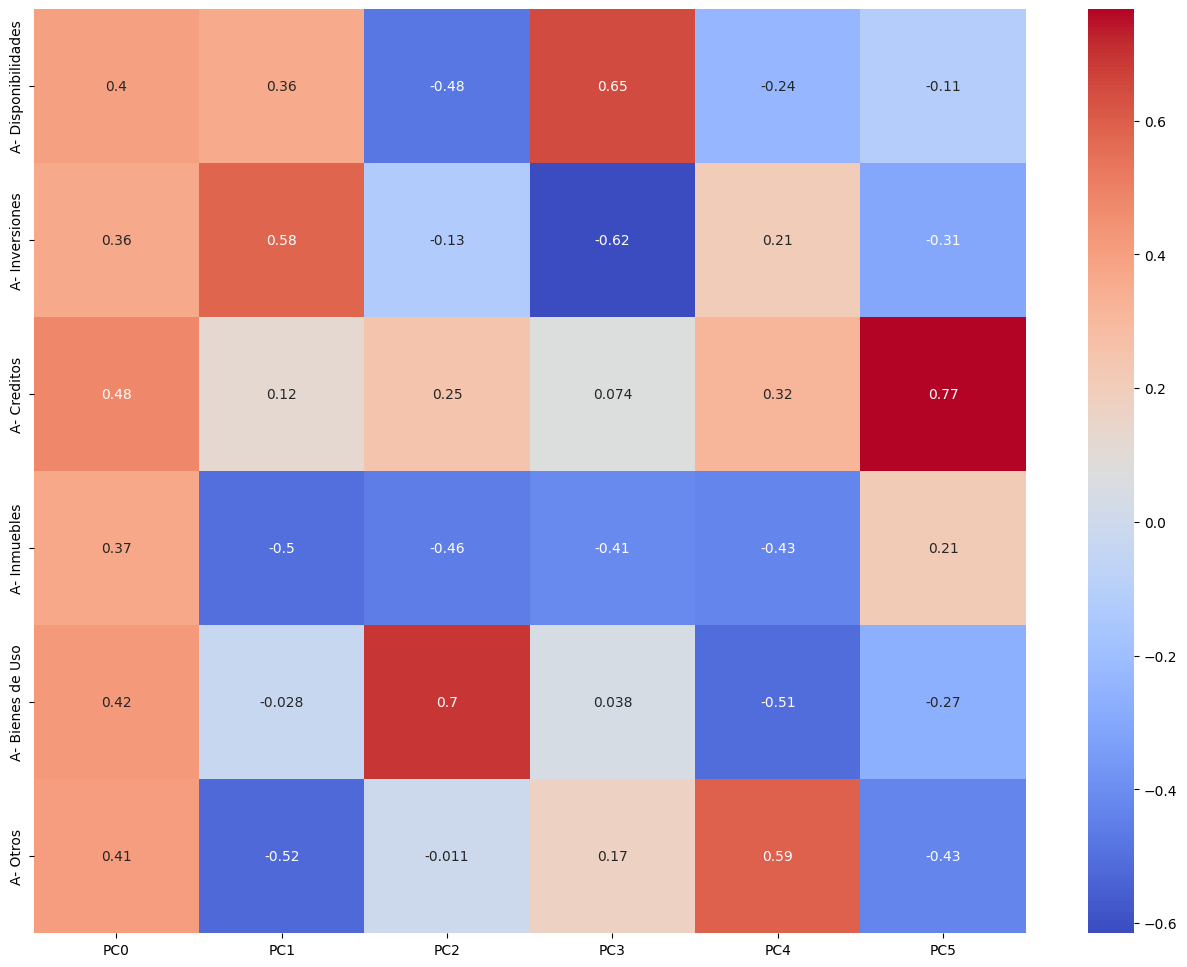

In [45]:
# heatmap de la varianza de los componentes
plt.figure(figsize=(16, 12))
sns.heatmap(loadings_ind, annot=True, cmap='coolwarm')
#plt.title('Gráfico IX: PCA Loadings Heatmap')
plt.show()

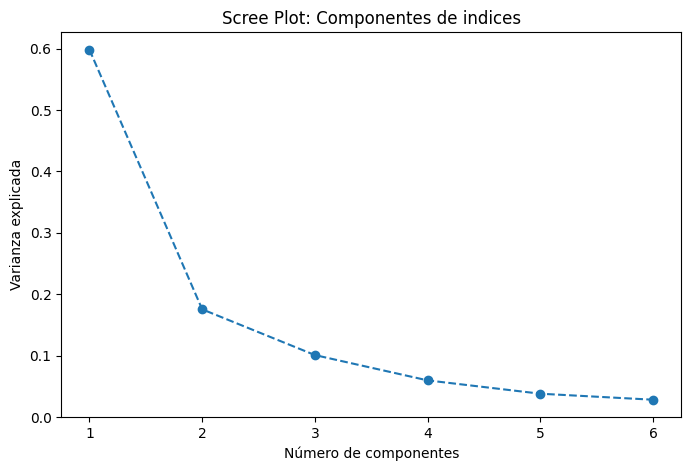

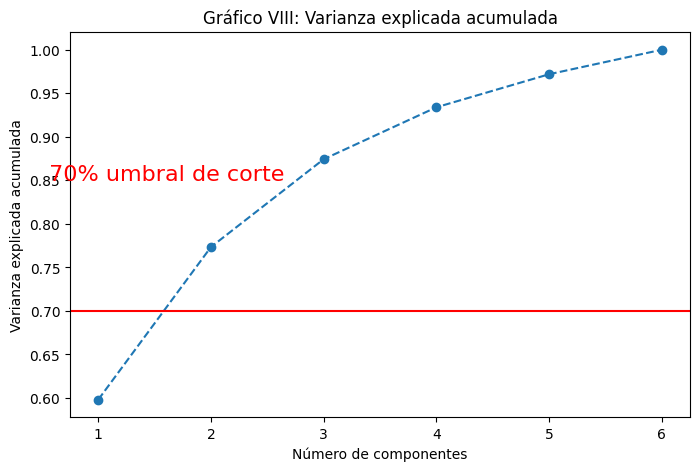

In [46]:
# Scree plot
plt.figure(figsize=(8,5))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o', linestyle='--')
plt.title('Scree Plot: Componentes de indices')
plt.xlabel('Número de componentes')
plt.ylabel('Varianza explicada')
plt.xticks(np.arange(1, len(pca.explained_variance_ratio_) + 1))
plt.show()

# Varianza acumulada
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Gráfico de la varianza acumulada
plt.figure(figsize=(8,5))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.title('Gráfico VIII: Varianza explicada acumulada')
plt.xlabel('Número de componentes')
plt.ylabel('Varianza explicada acumulada')
plt.xticks(np.arange(1, len(cumulative_explained_variance) + 1))
plt.axhline(y=0.7, color='r', linestyle='-')  # línea de corte estabelcer umbral según criterio
plt.text(0.5, 0.85, ' 70% umbral de corte', color = 'red', fontsize=16)
plt.show()

*  Se confirma utilizar dos componentes el primero general que explica aprox 40 de las variables mientras que el siguiente relaciona de maner posivia con inversiones pero se detrae con inmuebles y otros activos (es decir explica donde se encuentra fuertemente la estructuda de inversion)

In [47]:
principal_components_ind = pd.DataFrame(principal_components_ind, columns=[f'PC{i}' for i in range(0, len(data_act.columns))])
df_pca_a = principal_components_ind[['PC0', 'PC1']].copy()
df_pca_a.columns = ['APC0', 'APC1']

principal_components_ind.head()

PC0       PC1       PC2       PC3       PC4       PC5
0 -0.765878 -0.079447  0.020593  0.136165  0.117729 -0.041071
1  0.673574 -0.436127 -0.778372 -0.338375 -0.762627  0.371808
2 -0.715130 -0.123014  0.090413  0.124293  0.040232 -0.084931
3  3.983283  1.481084  0.444257  0.821825  0.291261  1.549700
4 -0.582941 -0.235959  0.097799  0.051926 -0.149061 -0.085983

### 4.2 para variables del Pasivo

In [48]:
columnas_a_extraer= [
    'P- Deudas c/Asegurados',
    'P- Otras Deudas',
    'P- Compromisos Tecnicos',
    'P- Previsiones',
    'PATRIMONIO NETO ',
]
data_pas = data[columnas_a_extraer]
data_pas

P- Deudas c/Asegurados  P- Otras Deudas  P- Compromisos Tecnicos  \
0              7.721593e+05       2786918.76             2.030012e+06   
1              2.457966e+07       5353245.59             5.635377e+06   
2              5.189734e+05       2181411.05             9.572658e+05   
3              1.763053e+08      82246929.23             7.124484e+07   
4              5.880267e+06       2160897.90             6.427633e+05   
..                      ...              ...                      ...   
718            3.470496e+06      35002371.57             5.125377e+08   
719            1.199845e+04        136083.76             7.148357e+06   
720            3.661973e+04       7193445.47             8.210790e+07   
721            2.393523e+05       2723919.34             6.155926e+07   
722            4.921195e+05       4510701.00             4.313639e+07   

     P- Previsiones  PATRIMONIO NETO   
0          83494.40      3.419664e+06  
1          53278.99      9.816789e+07  
2         719578.58      4.138433e+06  
3        2102430.63      2.205199e+08  
4              0.00      1.890646e+06  
..              ...               ...  
718     21126402.77      4.694519e+07  
719            0.00      1.382275e+06  
720       368778.19      2.615506e+07  
721        28743.05      1.466700e+07  
722        13597.11      9.637808e+06  

[723 rows x 5 columns]

In [49]:
Z = data_pas.values

# Estandarizar los datos
scaler = StandardScaler()
Z_scaled = scaler.fit_transform(Z)

#ocultar texto warning
import warnings
warnings.filterwarnings('ignore')

pca = PCA()
principal_components_ind = pca.fit_transform(Z_scaled)

explained_variance_ratio = pca.explained_variance_ratio_

# Crear un DataFrame con la información
df_varianza = pd.DataFrame({'Componente': range(1, len(explained_variance_ratio) + 1),
                            'Varianza Explicada': explained_variance_ratio})

# Mostrar el DataFrame
df_varianza

Componente  Varianza Explicada
0           1            0.563227
1           2            0.194735
2           3            0.152187
3           4            0.059711
4           5            0.030141

*  el primer componente explica el 56% pero no es sufciente

In [50]:
principal_components_ind

array([[-0.65357459, -0.1569692 ,  0.13719917, -0.02883027,  0.02911394],
       [ 0.16438956, -0.15820558, -0.13137187, -0.37127412, -0.6913096 ],
       [-0.65566033, -0.1725749 ,  0.16226795, -0.03993178,  0.01404087],
       ...,
       [-0.28227339,  0.57533613,  0.20036983, -0.06674313, -0.0408188 ],
       [-0.48352486,  0.37848816,  0.25280847, -0.00324988, -0.07022895],
       [-0.51135436,  0.21724916,  0.18680709, -0.01024731,  0.01896132]])

In [51]:
loadings_ind = pd.DataFrame(pca.components_.T, columns=[f'PC{i}' for i in range(0, len(data_pas.columns))], index=data_pas.columns[0:])
loadings_ind

PC0       PC1       PC2       PC3       PC4
P- Deudas c/Asegurados   0.513807 -0.249830  0.006625  0.798360 -0.190168
P- Otras Deudas          0.511569  0.072834 -0.486731 -0.137878  0.690706
P- Compromisos Tecnicos  0.180072  0.935072  0.252896  0.169895 -0.019844
P- Previsiones           0.382650 -0.239232  0.811111 -0.265849  0.260328
PATRIMONIO NETO          0.543555  0.026248 -0.202957 -0.494035 -0.646991

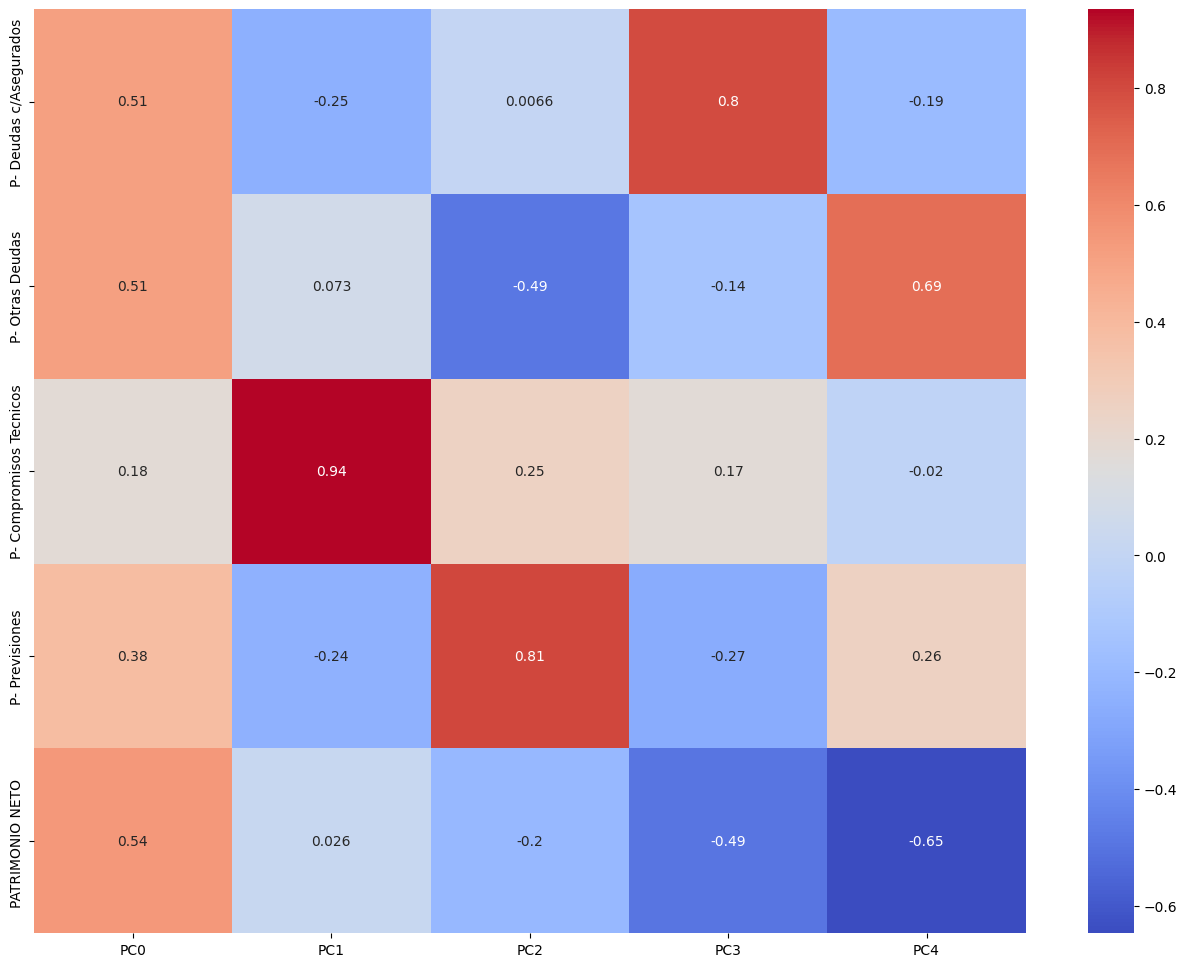

In [52]:
# heatmap de la varianza de los componentes
plt.figure(figsize=(16, 12))
sns.heatmap(loadings_ind, annot=True, cmap='coolwarm')
#plt.title('Gráfico IX: PCA Loadings Heatmap')
plt.show()

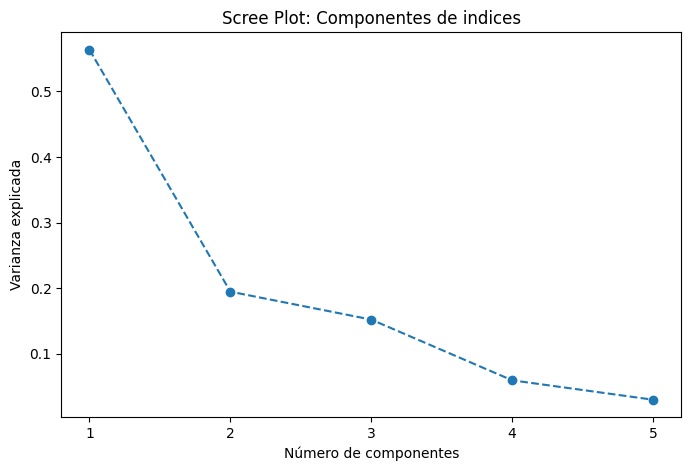

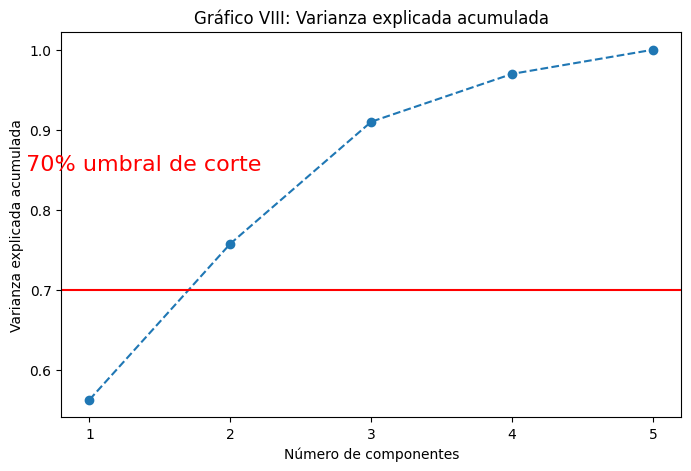

In [53]:
plt.figure(figsize=(8,5))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o', linestyle='--')
plt.title('Scree Plot: Componentes de indices')
plt.xlabel('Número de componentes')
plt.ylabel('Varianza explicada')
plt.xticks(np.arange(1, len(pca.explained_variance_ratio_) + 1))
plt.show()

# Varianza acumulada
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Gráfico de la varianza acumulada
plt.figure(figsize=(8,5))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.title('Gráfico VIII: Varianza explicada acumulada')
plt.xlabel('Número de componentes')
plt.ylabel('Varianza explicada acumulada')
plt.xticks(np.arange(1, len(cumulative_explained_variance) + 1))
plt.axhline(y=0.7, color='r', linestyle='-')  # línea de corte estabelcer umbral según criterio
plt.text(0.5, 0.85, ' 70% umbral de corte', color = 'red', fontsize=16)
plt.show()

*  Nuevamente con dos variables obtenemos una explicacion de más del 70%

In [54]:
principal_components_ind = pd.DataFrame(principal_components_ind, columns=[f'PC{i}' for i in range(0, len(data_pas.columns))])
df_pca_p = principal_components_ind[['PC0', 'PC1']].copy()
df_pca_p.columns = ['PPC0', 'PPC1']
principal_components_ind.head()

PC0       PC1       PC2       PC3       PC4
0 -0.653575 -0.156969  0.137199 -0.028830  0.029114
1  0.164390 -0.158206 -0.131372 -0.371274 -0.691310
2 -0.655660 -0.172575  0.162268 -0.039932  0.014041
3  3.538118  0.212985 -1.639789  0.021280  0.067438
4 -0.648206 -0.185994  0.147319  0.030443  0.012306

### 4.3 para variables de resultados de seguros directos
 (menos las variables que conforman el indice a predecir)


In [83]:
data_sd = data.filter(regex='^SD -')
columnas_a_eliminar = ['SD -  SiniestrosPagados', 'SD -  PrimasEmitidas', 'SD -  TOTAL', 'SD - Gastos de Produccion y Explotacion - Total ','SD - ResultadoTecnico deSegurosDirectos'] #quito las variables que conforman el idncie y las columnas de totales
data_sd = data_sd.drop(columns=columnas_a_eliminar, errors='ignore')
data_sd

SD -  PrimasCedidas  SD -  Variacionde RRC  SD - SiniestrosPagados  \
0             2502150.75              674037.07            6.770150e+05   
1               27925.53             2461057.08            5.254696e+06   
2             1719217.27              172504.95            3.789958e+05   
3            49447982.63             9473870.58            1.171527e+08   
4               63056.66               76052.12            1.323124e+06   
..                   ...                    ...                     ...   
718                 0.00            41820210.28            0.000000e+00   
719                 0.00             1874767.39            0.000000e+00   
720                 0.00            82529567.29            8.667683e+04   
721                 0.00              569300.39            0.000000e+00   
722                 0.00             6362335.88            0.000000e+00   

     SD - SiniestrosPagados.1  SD - SiniestrosPagados.2  \
0                   185885.68                 416348.48   
1                        0.00                      0.00   
2                    42266.69                   2274.44   
3                  2727300.27               23662821.11   
4                      237.64                 344655.25   
..                        ...                       ...   
718                      0.00                      0.00   
719                      0.00                      0.00   
720                      0.00                      0.00   
721                      0.00                      0.00   
722                      0.00                      0.00   

     SD - SiniestrosPagados.3  SD - SiniestrosPagados.4  SD - Rescates  \
0                   163941.24              2.387221e+05           0.00   
1                  2866452.05              8.121148e+06           0.00   
2                   155697.86              4.901525e+05           0.00   
3                 10884967.80              1.016475e+08       42929.02   
4                   997908.56              1.976139e+06           0.00   
..                        ...                       ...            ...   
718                      0.00              0.000000e+00     8296696.44   
719                      0.00              0.000000e+00      903558.94   
720                      0.00              8.667683e+04     6114985.59   
721                      0.00              0.000000e+00     3109119.28   
722                  41952.22              4.195222e+04      893245.72   

     SD - RentasVitaliciasyPeriodicas  SD - Gastos deProduccion   \
0                                0.00                 1874931.55   
1                                0.00                 8826421.40   
2                                0.00                  581784.40   
3                                0.00                44295211.92   
4                                0.00                 1062071.77   
..                                ...                        ...   
718                       58260000.19                   18403.14   
719                              0.00                  158405.68   
720                        1396575.91                  432496.12   
721                        2046872.74                   46780.03   
722                        2003202.02                   16718.81   

     SD - Gastos deExplotacion   SD - Gastos a/c delReasegurador  
0                    2695758.27                       1236161.54  
1                    1972755.71                             0.00  
2                    1667111.35                       1032170.99  
3                   33017539.44                       9531067.94  
4                    1312312.09                             0.00  
..                          ...                              ...  
718                 23943952.96                             0.00  
719                   478083.28                             0.00  
720                  2383408.83                             0.00  
721                

In [84]:
Z = data_sd.values

# Estandarizar los datos
scaler = StandardScaler()
Z_scaled = scaler.fit_transform(Z)

#ocultar texto warning
import warnings
warnings.filterwarnings('ignore')

pca = PCA()
principal_components_ind = pca.fit_transform(Z_scaled)

explained_variance_ratio = pca.explained_variance_ratio_

# Crear un DataFrame con la información
df_varianza = pd.DataFrame({'Componente': range(1, len(explained_variance_ratio) + 1),
                            'Varianza Explicada': explained_variance_ratio})

# Mostrar el DataFrame
df_varianza

Componente  Varianza Explicada
0            1            0.479916
1            2            0.160705
2            3            0.156686
3            4            0.080244
4            5            0.038160
5            6            0.024741
6            7            0.015380
7            8            0.013254
8            9            0.011310
9           10            0.010170
10          11            0.008422
11          12            0.001014

*  el primer componente explica el 48% de las variables

In [85]:
principal_components_ind

array([[-0.66184985, -0.27378953,  0.26546371, ..., -0.01412657,
        -0.06148996,  0.00380556],
       [-0.66255229, -0.10393906, -0.18822289, ...,  0.24341107,
        -0.1005601 , -0.02392878],
       [-0.78410046, -0.2658133 ,  0.18783685, ..., -0.04557133,
        -0.0604518 ,  0.01076828],
       ...,
       [-0.76664107,  2.45277716,  0.47907645, ...,  0.22939884,
         1.23442808,  0.07273562],
       [-0.96952162,  0.20493508,  0.01599007, ..., -0.02257022,
        -0.2759672 ,  0.00378951],
       [-0.9374531 ,  0.147857  , -0.00571048, ...,  0.02349864,
         0.03478583,  0.00860874]])

In [86]:
loadings_ind = pd.DataFrame(pca.components_.T, columns=[f'PC{i}' for i in range(0, len(data_sd.columns))], index=data_sd.columns[0:])
loadings_ind

PC0       PC1       PC2       PC3  \
SD -  PrimasCedidas               0.278931 -0.115681  0.459800  0.001695   
SD -  Variacionde RRC             0.053454  0.673973  0.138844 -0.111517   
SD - SiniestrosPagados            0.382863  0.015807 -0.258759  0.000157   
SD - SiniestrosPagados.1          0.339066 -0.009157 -0.136821  0.011031   
SD - SiniestrosPagados.2          0.306626 -0.106662  0.428401  0.006165   
SD - SiniestrosPagados.3          0.280514  0.036684 -0.388612 -0.005125   
SD - SiniestrosPagados.4          0.365565  0.028274 -0.270484 -0.003980   
SD - Rescates                     0.007730  0.668246  0.153665 -0.189960   
SD - RentasVitaliciasyPeriodicas -0.011683  0.207885  0.036795  0.973212   
SD - Gastos deProduccion          0.382860  0.039380 -0.043807 -0.024713   
SD - Gastos deExplotacion         0.377217  0.066847 -0.056962  0.058037   
SD - Gastos a/c delReasegurador   0.249749 -0.150783  0.495773  0.012403   

                                       PC4       PC5       PC6       PC7  \
SD -  PrimasCedidas               0.187345  0.048711  0.699236  0.054440   
SD -  Variacionde RRC             0.004526 -0.001151  0.024758 -0.269314   
SD - SiniestrosPagados            0.135839 -0.006953 -0.046446 -0.154119   
SD - SiniestrosPagados.1         -0.561793  0.721594  0.020509 -0.044734   
SD - SiniestrosPagados.2         -0.015836  0.029210  0.048411 -0.114920   
SD - SiniestrosPagados.3          0.678966  0.297892  0.050431  0.263772   
SD - SiniestrosPagados.4          0.034584 -0.233817 -0.044224 -0.522183   
SD - Rescates                     0.057915  0.098778 -0.046878  0.210194   
SD - RentasVitaliciasyPeriodicas  0.030586  0.017133  0.008894 -0.032782   
SD - Gastos deProduccion         -0.176926 -0.454661  0.048644 -0.082212   
SD - Gastos deExplotacion        -0.275893 -0.317434 -0.113614  0.699976   
SD - Gastos a/c delReasegurador   0.238045  0.122821 -0.695331 -0.036241   

                                       PC8       PC9      PC10      PC11  
SD -  PrimasCedidas              -0.277350 -0.280124 -0.104081  0.042498  
SD -  Variacionde RRC            -0.305983  0.107561  0.576221  0.028266  
SD - SiniestrosPagados            0.186199 -0.176684  0.028809  0.821634  
SD - SiniestrosPagados.1         -0.123148  0.047623 -0.072502 -0.068467  
SD - SiniestrosPagados.2          0.710427  0.326793  0.260889 -0.121739  
SD - SiniestrosPagados.3         -0.039553  0.282277  0.078382 -0.244291  
SD - SiniestrosPagados.4          0.098426 -0.460713 -0.083533 -0.482666  
SD - Rescates                     0.306935 -0.133319 -0.567345 -0.018323  
SD - RentasVitaliciasyPeriodicas  0.019151  0.016297 -0.071562  0.003962  
SD - Gastos deProduccion         -0.275057  0.618315 -0.378707  0.028352  
SD - Gastos deExplotacion         0.002536 -0.260707  0.299986 -0.094363  
SD - Gastos a/c delReasegurador  -0.305644 -0.097082 -0.097224  0.010034

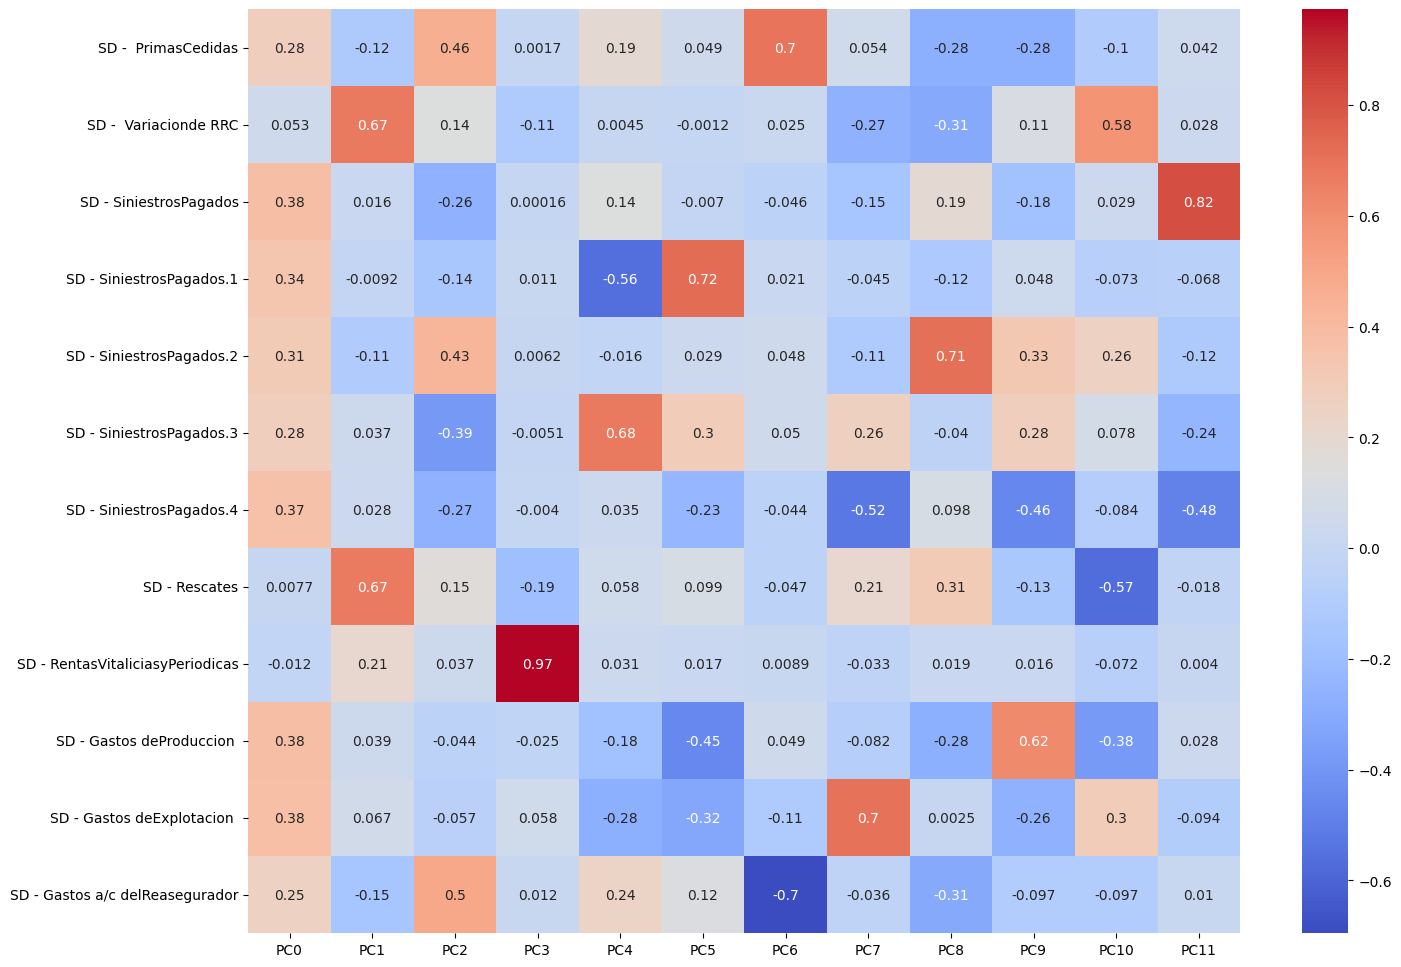

In [87]:
# heatmap de la varianza de los componentes
plt.figure(figsize=(16, 12))
sns.heatmap(loadings_ind, annot=True, cmap='coolwarm')
#plt.title('Gráfico IX: PCA Loadings Heatmap')
plt.show()

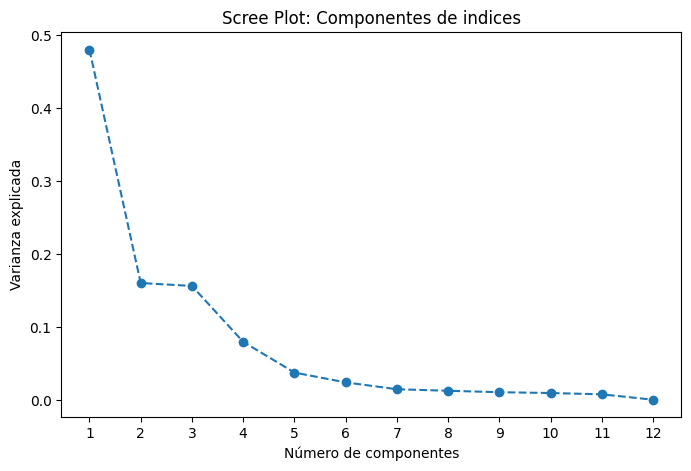

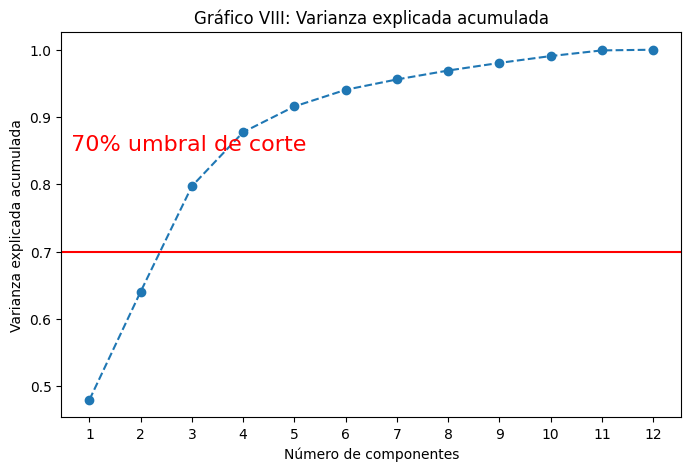

In [88]:
plt.figure(figsize=(8,5))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o', linestyle='--')
plt.title('Scree Plot: Componentes de indices')
plt.xlabel('Número de componentes')
plt.ylabel('Varianza explicada')
plt.xticks(np.arange(1, len(pca.explained_variance_ratio_) + 1))
plt.show()

# Varianza acumulada
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Gráfico de la varianza acumulada
plt.figure(figsize=(8,5))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.title('Gráfico VIII: Varianza explicada acumulada')
plt.xlabel('Número de componentes')
plt.ylabel('Varianza explicada acumulada')
plt.xticks(np.arange(1, len(cumulative_explained_variance) + 1))
plt.axhline(y=0.7, color='r', linestyle='-')  # línea de corte estabelcer umbral según criterio
plt.text(0.5, 0.85, ' 70% umbral de corte', color = 'red', fontsize=16)
plt.show()

*  los componentes en este caso es necesario utilizar 3 para conseguir al menos el 70% de representacion

In [89]:
principal_components_ind = pd.DataFrame(principal_components_ind, columns=[f'PC{i}' for i in range(0, len(data_sd.columns))])
df_pca_sd = principal_components_ind[['PC0', 'PC1','PC2']].copy()
df_pca_sd.columns = ['SDPC0', 'SDPC1','SDPC2']

principal_components_ind.head()

PC0       PC1       PC2       PC3       PC4       PC5       PC6  \
0 -0.661850 -0.273790  0.265464 -0.068584  0.057787  0.117857 -0.250536   
1 -0.662552 -0.103939 -0.188223 -0.095676  0.012331 -0.160077  0.045553   
2 -0.784100 -0.265813  0.187837 -0.070240  0.095170  0.090729 -0.221465   
3  5.174506 -1.023902  3.399362  0.003608  0.495657  0.146561 -0.917347   
4 -0.888192 -0.191676 -0.082830 -0.077432  0.012404  0.017251  0.034819   

        PC7       PC8       PC9      PC10      PC11  
0 -0.028891 -0.157821 -0.014127 -0.061490  0.003806  
1 -0.115148 -0.076923  0.243411 -0.100560 -0.023929  
2 -0.043089 -0.129753 -0.045571 -0.060452  0.010768  
3 -0.687986  0.027568  0.104340 -0.115282 -0.081118  
4 -0.052664  0.071529  0.056869 -0.005862 -0.011891

### 4.4 para variables de resultados financieros:
                          

In [62]:
data_finan = data.filter(regex='^RF -')
columnas_a_eliminar = ['RF -  TOTAL',  'RF -  RESULTADODELEJERCICIO'] #quito las variables que conforman el idncie y las columnas de totales
data_finan = data_finan.drop(columns=columnas_a_eliminar, errors='ignore')
data_finan

RF -  Rentas  RF -  Resultados porRealizacion  \
0      1534724.63                        260730.23   
1      1864198.28                             0.00   
2       790811.81                         36997.33   
3     34595623.29                        218091.69   
4       129334.04                       3435327.01   
..            ...                              ...   
718    2481047.77                             0.00   
719     171687.58                       1306294.25   
720   21509174.87                      35717547.94   
721   20485917.05                      11099102.32   
722   43180581.79                             0.00   

     RF -  Resultados porTenencia  RF -  OtrosIngresos  RF -  OtrosEgresos  \
0                    0.000000e+00               784.55        1.593712e+05   
1                    1.647554e+07                 0.00        1.259693e+06   
2                    5.636245e+05               821.07        1.803691e+04   
3                    3.169421e+07            137538.02        0.000000e+00   
4                    1.194662e+04                 0.00        0.000000e+00   
..                            ...                  ...                 ...   
718                  7.264715e+08            206669.50        5.943322e+08   
719                  6.188653e+06             39114.13        2.373187e+05   
720                  1.597799e+07            123262.39        5.473858e+07   
721                  5.572285e+07                 0.00        1.113390e+06   
722                  2.333844e+07              4547.84        2.217160e+04   

     RF -  Gastos deExplotacion yOtros Cargos  RF -  RECPAM  \
0                                   814882.46  7.565338e+05   
1                                   190001.27  1.707438e+07   
2                                   622240.12  1.516401e+06   
3                                  2603829.32  8.601709e+07   
4                                   516804.78  8.901771e+05   
..                                        ...           ...   
718                                 112552.21  6.979104e+08   
719                                    582.18  8.332838e+06   
720                                  99780.82  1.922792e+07   
721                                 635254.53  8.520797e+07   
722                                  86582.02  6.659522e+07   

     RF -  ResultadoOperacionesOrdinarias  \
0                               858047.70   
1                             14664919.24   
2                               463405.14   
3                             18120755.79   
4                              5721826.96   
..                                    ...   
718                            2174957.71   
719                             782985.04   
720                            4204862.37   
721                            1893958.51   
722                            2713877.21   

     RF -  Resultado OperacionesExtraordinarias  RF -  Impuestoa lasGanancias  
0                                           0.0                     208830.67  
1                                           0.0                          0.00  
2                                           0.0                      69993.51  
3                                           0.0                    5402294.35  
4                                           0.0                          0.00  
..                                          ...                           ...  
718                                         0.0                    3181074.81  
719                                         0.0                      32410.78  
720                                         0.0                    2003554.45  
721                                         0.0                     315140.13  
722                                         0.0                      87965.88  

[723 rows x 10 columns]

In [63]:
Z = data_finan.values

# Estandarizar los datos
scaler = StandardScaler()
Z_scaled = scaler.fit_transform(Z)

#ocultar texto warning
import warnings
warnings.filterwarnings('ignore')

pca = PCA()
principal_components_ind = pca.fit_transform(Z_scaled)

explained_variance_ratio = pca.explained_variance_ratio_

# Crear un DataFrame con la información
df_varianza = pd.DataFrame({'Componente': range(1, len(explained_variance_ratio) + 1),
                            'Varianza Explicada': explained_variance_ratio})

# Mostrar el DataFrame
df_varianza

Componente  Varianza Explicada
0           1            0.408455
1           2            0.134935
2           3            0.100368
3           4            0.099619
4           5            0.080327
5           6            0.068141
6           7            0.052112
7           8            0.031881
8           9            0.022825
9          10            0.001337

* el componente principal explica el 40% de las variable lo que no lo hace sufciente

In [64]:
principal_components_ind

array([[-6.51766520e-01, -6.83191806e-02,  2.84650490e-02, ...,
         4.92208271e-02, -6.31923570e-02, -2.27792582e-04],
       [-3.20179235e-01, -2.74259943e-01, -2.69203710e-01, ...,
        -3.63785512e-01,  3.99567151e-01, -4.57192613e-02],
       [-6.91796716e-01, -7.63499313e-02,  5.46705115e-02, ...,
         6.37116671e-02, -3.42001920e-02,  5.83444315e-03],
       ...,
       [ 5.13326886e-01,  1.17444970e-01,  4.68813597e-01, ...,
        -6.00246510e-01, -8.96870076e-01, -4.33146302e-01],
       [ 1.64151575e-01,  2.65116021e-01,  1.34469069e-01, ...,
         1.39322645e-01,  1.58209180e-01, -6.72722862e-02],
       [ 8.96318513e-02,  3.37546766e-01, -1.75289096e-01, ...,
         2.26853888e-01,  2.08785895e-02,  7.96615902e-03]])

In [65]:
loadings_ind = pd.DataFrame(pca.components_.T, columns=[f'PC{i}' for i in range(0, len(data_finan.columns))], index=data_finan.columns[0:])
loadings_ind

PC0       PC1       PC2  \
RF -  Rentas                                0.297543  0.282751 -0.176489   
RF -  Resultados porRealizacion             0.243800  0.454829  0.143582   
RF -  Resultados porTenencia                0.429233 -0.213982  0.209261   
RF -  OtrosIngresos                         0.186920  0.555848  0.142074   
RF -  OtrosEgresos                          0.263578 -0.488450  0.356940   
RF -  Gastos deExplotacion yOtros Cargos    0.345263  0.130422 -0.123468   
RF -  RECPAM                                0.463067  0.057430  0.162785   
RF -  ResultadoOperacionesOrdinarias        0.317637 -0.178817 -0.424615   
RF -  Resultado OperacionesExtraordinarias -0.008517 -0.008544  0.691946   
RF -  Impuestoa lasGanancias                0.358848 -0.259782 -0.236694   

                                                 PC3       PC4       PC5  \
RF -  Rentas                                0.170601 -0.366911 -0.542975   
RF -  Resultados porRealizacion            -0.133252  0.649982 -0.276580   
RF -  Resultados porTenencia               -0.195988 -0.161032 -0.009452   
RF -  OtrosIngresos                        -0.125129 -0.089696  0.706093   
RF -  OtrosEgresos                         -0.347815 -0.025634  0.069571   
RF -  Gastos deExplotacion yOtros Cargos    0.131345 -0.492433  0.111290   
RF -  RECPAM                               -0.150277  0.047258 -0.189313   
RF -  ResultadoOperacionesOrdinarias        0.405443  0.218522  0.207931   
RF -  Resultado OperacionesExtraordinarias  0.721801  0.003386 -0.004314   
RF -  Impuestoa lasGanancias                0.229956  0.340262  0.183594   

                                                 PC6       PC7       PC8  \
RF -  Rentas                               -0.541571  0.068119 -0.171340   
RF -  Resultados porRealizacion             0.206522 -0.231469 -0.187620   
RF -  Resultados porTenencia                0.134731  0.251617  0.458454   
RF -  OtrosIngresos                        -0.330674  0.065150  0.001384   
RF -  OtrosEgresos                         -0.311811 -0.393506 -0.429104   
RF -  Gastos deExplotacion yOtros Cargos    0.635150 -0.232003 -0.344162   
RF -  RECPAM                                0.074703  0.104355  0.366923   
RF -  ResultadoOperacionesOrdinarias       -0.173997 -0.529327  0.344433   
RF -  Resultado OperacionesExtraordinarias -0.005636 -0.002521  0.000487   
RF -  Impuestoa lasGanancias               -0.004766  0.611941 -0.411599   

                                                 PC9  
RF -  Rentas                               -0.120517  
RF -  Resultados porRealizacion            -0.254785  
RF -  Resultados porTenencia               -0.608362  
RF -  OtrosIngresos                        -0.006919  
RF -  OtrosEgresos                          0.043131  
RF -  Gastos deExplotacion yOtros Cargos    0.026914  
RF -  RECPAM                                0.737572  
RF -  ResultadoOperacionesOrdinarias       -0.048640  
RF -  Resultado OperacionesExtraordinarias -0.000278  
RF -  Impuestoa lasGanancias                0.038009

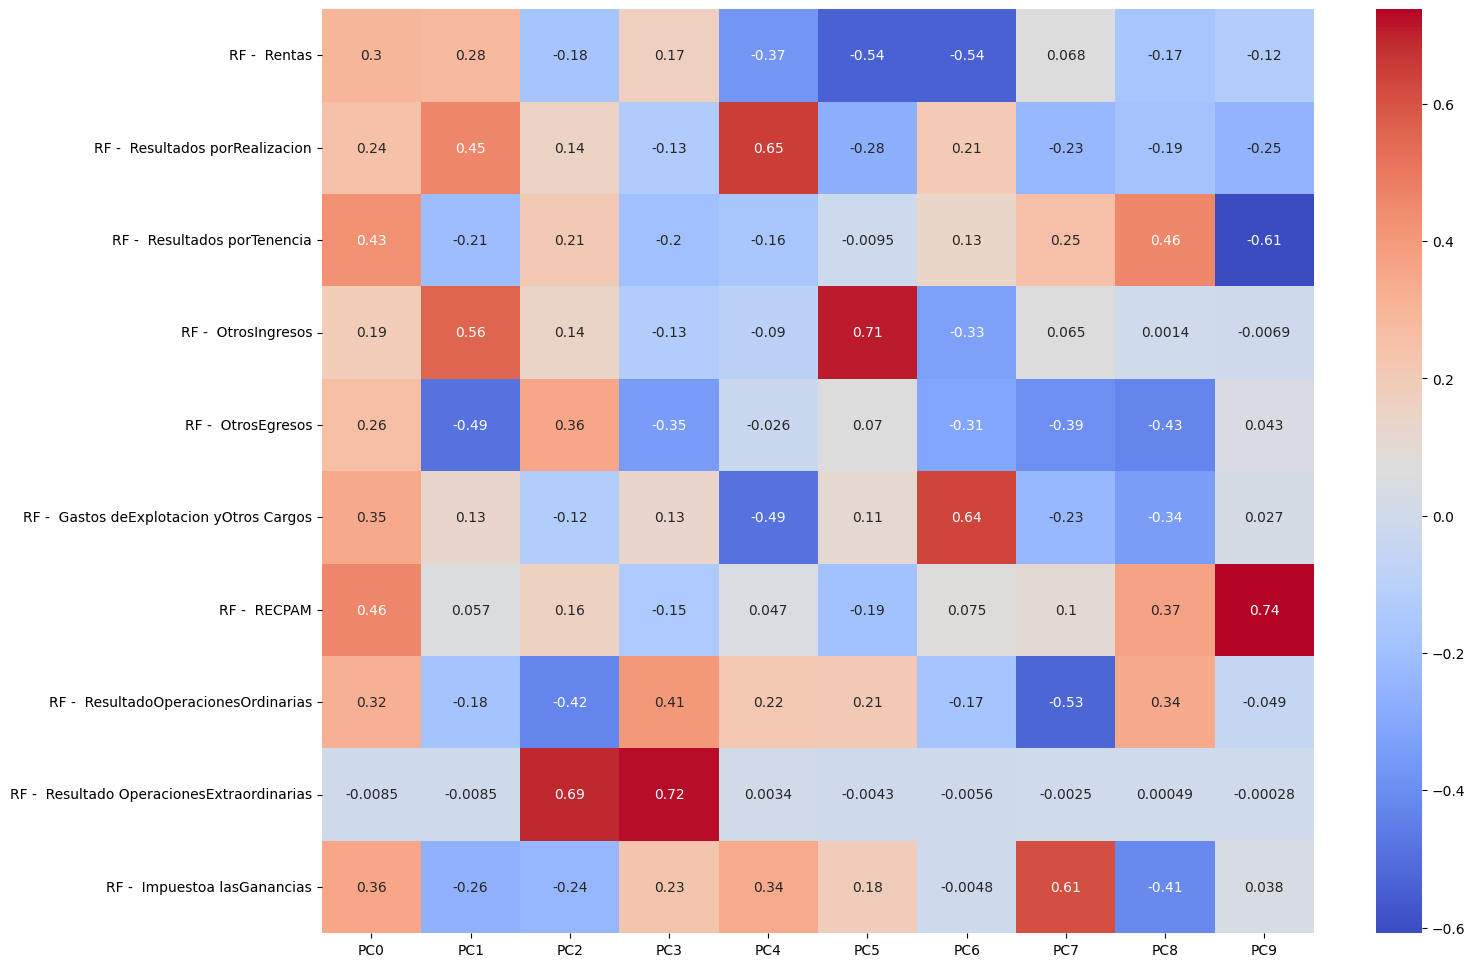

In [66]:
# heatmap de la varianza de los componentes
plt.figure(figsize=(16, 12))
sns.heatmap(loadings_ind, annot=True, cmap='coolwarm')
#plt.title('Gráfico IX: PCA Loadings Heatmap')
plt.show()

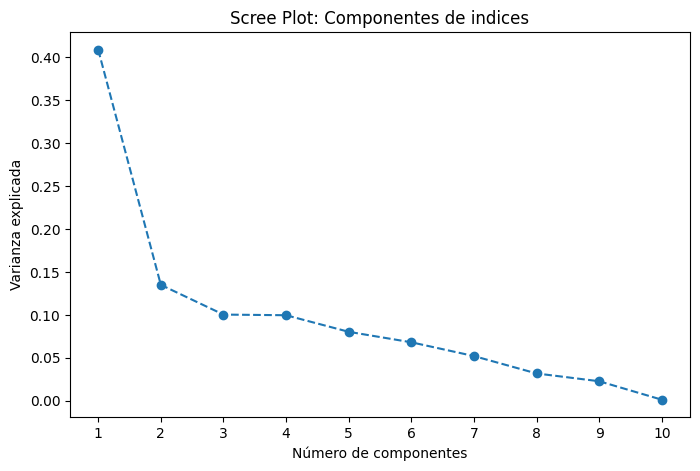

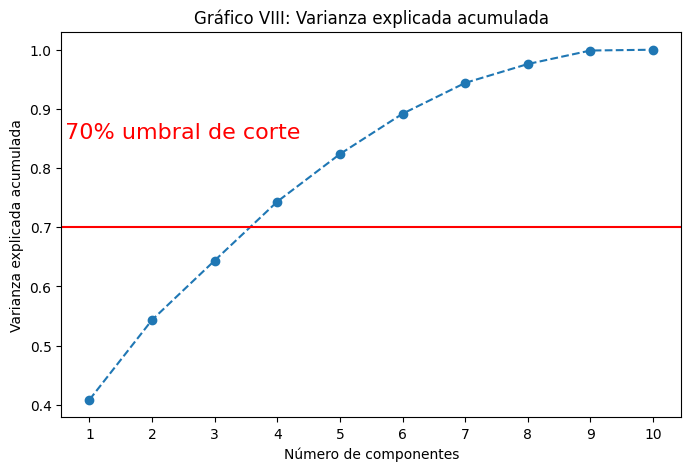

In [67]:
plt.figure(figsize=(8,5))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o', linestyle='--')
plt.title('Scree Plot: Componentes de indices')
plt.xlabel('Número de componentes')
plt.ylabel('Varianza explicada')
plt.xticks(np.arange(1, len(pca.explained_variance_ratio_) + 1))
plt.show()

# Varianza acumulada
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Gráfico de la varianza acumulada
plt.figure(figsize=(8,5))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.title('Gráfico VIII: Varianza explicada acumulada')
plt.xlabel('Número de componentes')
plt.ylabel('Varianza explicada acumulada')
plt.xticks(np.arange(1, len(cumulative_explained_variance) + 1))
plt.axhline(y=0.7, color='r', linestyle='-')  # línea de corte estabelcer umbral según criterio
plt.text(0.5, 0.85, ' 70% umbral de corte', color = 'red', fontsize=16)
plt.show()

*  es necesario el uso de 4 variables

In [68]:
principal_components_ind = pd.DataFrame(principal_components_ind, columns=[f'PC{i}' for i in range(0, len(data_finan.columns))])
df_pca_f = principal_components_ind[['PC0', 'PC1','PC2','PC3', 'PC4']].copy()
df_pca_f.columns = ['FPC0', 'FPC1','FPC2','FPC3','FPC4']

principal_components_ind

PC0       PC1       PC2       PC3       PC4       PC5       PC6  \
0   -0.651767 -0.068319  0.028465 -0.087374 -0.044587  0.042181  0.116440   
1   -0.320179 -0.274260 -0.269204  0.195520  0.185110  0.178327 -0.127118   
2   -0.691797 -0.076350  0.054671 -0.113161 -0.029933  0.045025  0.106268   
3    0.911410 -0.064478 -0.770131  0.691188 -0.240946 -0.340650 -0.427688   
4   -0.572869 -0.075176 -0.058068 -0.005421  0.160871  0.083407  0.075474   
..        ...       ...       ...       ...       ...       ...       ...   
718  7.749129 -7.756646  6.692386 -6.497645 -0.872937  0.102979 -3.079294   
719 -0.691563 -0.087738  0.098185 -0.156240  0.088808  0.022087  0.036114   
720  0.513327  0.117445  0.468814 -0.508818  0.870251 -0.675627 -0.498559   
721  0.164152  0.265116  0.134469 -0.181193 -0.010517 -0.595832 -0.132129   
722  0.089632  0.337547 -0.175289  0.111089 -0.554843 -0.931495 -0.851349   

          PC7       PC8       PC9  
0    0.049221 -0.063192 -0.000228  
1   -0.363786  0.399567 -0.045719  
2    0.063712 -0.034200  0.005834  
3    0.073370 -0.061101  0.102712  
4   -0.153206  0.068136 -0.047328  
..        ...       ...       ...  
718 -2.972002 -1.494642  0.496224  
719  0.085117  0.057989 -0.004345  
720 -0.600247 -0.896870 -0.433146  
721  0.139323  0.158209 -0.067272  
722  0.226854  0.020879  0.007966  

[723 rows x 10 columns]

## Datframe obtenido

In [69]:
df_final = data[['NJ','Sector','Quarter', 'A_rec', 'B_log','top','Loss_ratio']].copy()
df_final = pd.concat([df_final, df_pca_a, df_pca_p,df_pca_sd, df_pca_f], axis=1)
df_final

NJ  Sector  Quarter     A_rec      B_log  top  Loss_ratio      APC0  \
0     1       1        3  0.086393     8.2943    4    0.092915 -0.765878   
1     2       1        3  0.082152  13.208359    4    0.758392  0.673574   
2     1       1        3  0.046357   8.936035    4    0.096936 -0.715130   
3     1       1        3  2.738927  12.510247    2    0.507153  3.983283   
4     1       1        3  0.039326  12.296375    4    0.398924 -0.582941   
..   ..     ...      ...       ...        ...  ...         ...       ...   
718   1       3        4  0.194205   11.44144    4    0.000000  0.558837   
719   1       3        4  0.039748        0.0    4    0.000000 -0.811447   
720   1       3        4  0.138052   8.071219    4    0.007452 -0.253074   
721   1       3        4  0.081142        0.0    4    0.000000 -0.647984   
722   1       3        4  0.017648   7.438972    4    0.000000 -0.688641   

         APC1      PPC0      PPC1     SDPC0     SDPC1     SDPC2      FPC0  \
0   -0.079447 -0.653575 -0.156969 -0.661850 -0.273790  0.265464 -0.651767   
1   -0.436127  0.164390 -0.158206 -0.662552 -0.103939 -0.188223 -0.320179   
2   -0.123014 -0.655660 -0.172575 -0.784100 -0.265813  0.187837 -0.691797   
3    1.481084  3.538118  0.212985  5.174506 -1.023902  3.399362  0.911410   
4   -0.235959 -0.648206 -0.185994 -0.888192 -0.191676 -0.082830 -0.572869   
..        ...       ...       ...       ...       ...       ...       ...   
718  1.864557  1.437532  4.308158 -0.633289  4.625295  0.777290  7.749129   
719 -0.111323 -0.715960 -0.116506 -0.964134 -0.067491 -0.041639 -0.691563   
720 -0.046146 -0.282273  0.575336 -0.766641  2.452777  0.479076  0.513327   
721  0.141965 -0.483525  0.378488 -0.969522  0.204935  0.015990  0.164152   
722  0.078343 -0.511354  0.217249 -0.937453  0.147857 -0.005710  0.089632   

         FPC1      FPC2      FPC3      FPC4  
0   -0.068319  0.028465 -0.087374 -0.044587  
1   -0.274260 -0.269204  0.195520  0.185110  
2   -0.076350  0.054671 -0.113161 -0.029933  
3   -0.064478 -0.770131  0.691188 -0.240946  
4   -0.075176 -0.058068 -0.005421  0.160871  
..        ...       ...       ...       ...  
718 -7.756646  6.692386 -6.497645 -0.872937  
719 -0.087738  0.098185 -0.156240  0.088808  
720  0.117445  0.468814 -0.508818  0.870251  
721  0.265116  0.134469 -0.181193 -0.010517  
722  0.337547 -0.175289  0.111089 -0.554843  

[723 rows x 19 columns]

# 5 - Aplicación de Métodos Predictivos de Regresión.

Para el problema planteado debe aplicar como mínimo un método predictivo no ensambles y dos ensambles.  Para cada uno de los métodos aplicados debe informar por lo menos dos métricas de evaluación del modelo. Para cada uno de los modelos planteados debe realizar CV, y por lo menos para el ensamble selección de parámetros.

In [70]:
# Separamos las variables predictoras (X) y la variable objetivo (y)
X = df_final.drop('Loss_ratio', axis=1)
y = df_final['Loss_ratio']

In [71]:
# Dividimos los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 5.1 Arboles de regresion con mejores parametros

In [72]:
from sklearn.model_selection import GridSearchCV
# Definir los valores posibles para los parámetros del modelo
param_grid = {'max_depth': [2, 4, 6, 8, 10],
              'min_samples_split': [2, 4, 6, 8, 10],
              'min_samples_leaf': [1, 2, 3, 4, 5]}

# Crear un objeto de árbol de regresión
treereg = DecisionTreeRegressor()

# Crear un objeto GridSearchCV con el modelo y los parámetros
grid_searchMSE = GridSearchCV(treereg, param_grid, cv=5, n_jobs=-1)

print("\n\n--- Ejecutando Arbol de regresion con mejores parametros ---")
# Ajustar el modelo con los datos
grid_searchMSE.fit(X_train, y_train)

# Imprimir los mejores parámetros encontrados
print(grid_searchMSE.best_params_)

# Imprimir la mejor puntuación del modelo
print(grid_searchMSE.best_score_)

{'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 2}
0.6689156258113448


In [73]:
# Evaluamos el modelo en el conjunto de testeo
y_pred = grid_searchMSE.predict(X_test) #Usamos el resultado obtenido con "la grilla"

# Obtenemos las métricas de evaluación
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('MSE en testeo: ', mse)
print('R2 en testeo: ', r2)

MSE en testeo:  0.04581889278400527
R2 en testeo:  0.5551413482925021


In [74]:
best_tree_model = grid_searchMSE.best_estimator_

print("\n--- Validación Cruzada para Árbol de Regresión ---")

# Aplicamos Validación Cruzada (usaremos cv=5 como ejemplo, ajústalo si prefieres 10)
mse_scores_tree = -cross_val_score(best_tree_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
r2_scores_tree = cross_val_score(best_tree_model, X_train, y_train, cv=5, scoring='r2')

# Imprimimos los resultados
print(f"Árbol - MSE promedio (CV): {mse_scores_tree.mean():.4f}")
print(f"Árbol - Desviación estándar del MSE (CV): {mse_scores_tree.std():.4f}")
print(f"Árbol - R2 promedio (CV): {r2_scores_tree.mean():.4f}")
print(f"Árbol - Desviación estándar del R2 (CV): {r2_scores_tree.std():.4f}")


--- Validación Cruzada para Árbol de Regresión ---
Árbol - MSE promedio (CV): 0.0403
Árbol - Desviación estándar del MSE (CV): 0.0177
Árbol - R2 promedio (CV): 0.6280
Árbol - Desviación estándar del R2 (CV): 0.1392


In [75]:
if isinstance(y_test, pd.DataFrame):
    if len(y_test.columns) == 1:
        y_test_series = y_test.iloc[:, 0]
    else:
        y_test_series = y_test.iloc[:, 0]
else:
    y_test_series = y_test
y_pred_series = pd.Series(y_pred, index=y_test_series.index, name='Prediccion') # Esto asegura que cada predicción se alinee con su valor real.

df_comparacion = pd.DataFrame({
    'Valor_Real': y_test_series,
    'Prediccion': y_pred_series
}) #  Crear el DataFrame final (Ahora ambos tienen el mismo índice) ---


#  Calcular las diferencias ---
df_comparacion['Diferencia'] = df_comparacion['Valor_Real'] - df_comparacion['Prediccion']
df_comparacion['Diferencia_%'] = (df_comparacion['Diferencia'] / (df_comparacion['Valor_Real'] + 1e-6)) * 100
df_comparacion_AR = df_comparacion.copy()
# ver
df_comparacion_AR

Valor_Real  Prediccion  Diferencia  Diferencia_%
336    0.454695    0.311471    0.143224  3.149891e+01
517    0.122351    0.181756   -0.059405 -4.855217e+01
598    0.139248    0.188031   -0.048783 -3.503293e+01
33     0.301576    0.196094    0.105482  3.497694e+01
439    0.000000    0.141782   -0.141782 -1.417819e+07
..          ...         ...         ...           ...
382    0.134263    0.196094   -0.061830 -4.605123e+01
328    0.229057    0.311471   -0.082414 -3.597935e+01
568    0.269304    0.461519   -0.192214 -7.137419e+01
429    0.568549    0.587653   -0.019104 -3.360110e+00
136    0.103525    0.064765    0.038759  3.743935e+01

[145 rows x 4 columns]

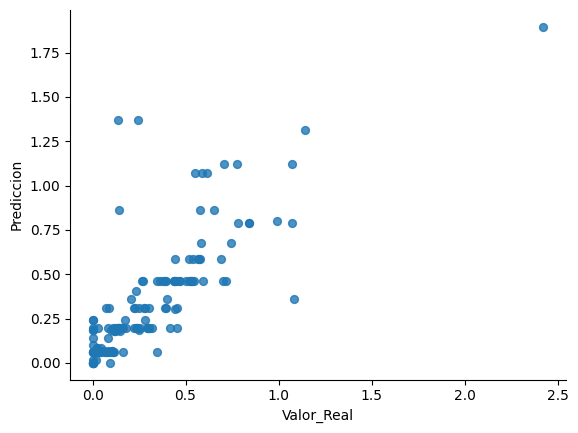

In [76]:
from matplotlib import pyplot as plt
df_comparacion_AR.plot(kind='scatter', x='Valor_Real', y='Prediccion', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

* se visualiza la relacion en la predicion

<Figure size 2000x1000 with 0 Axes>

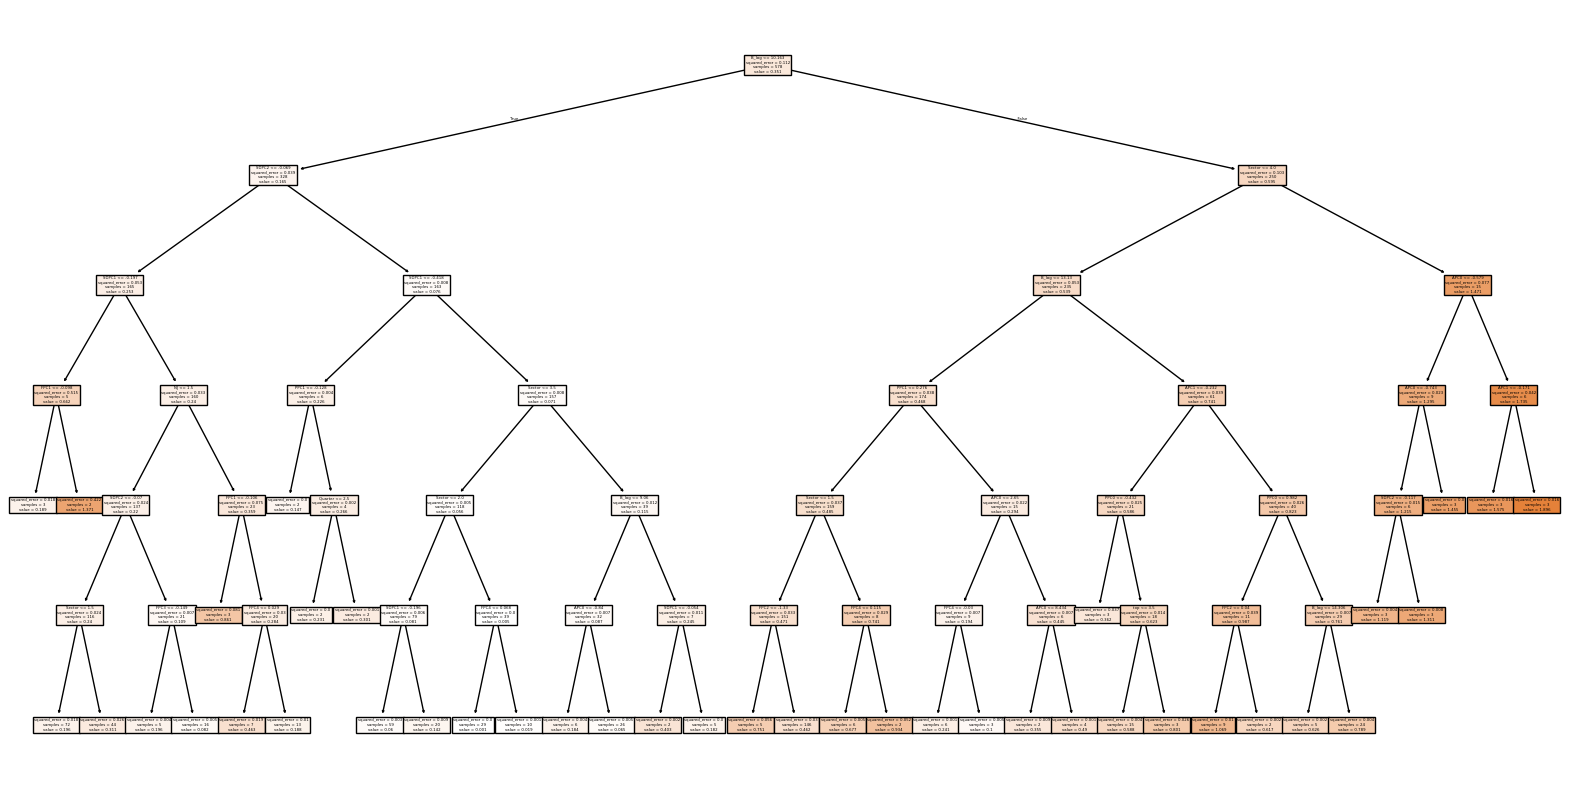

In [77]:
#Graficamos los árboles
best_treeMSE = grid_searchMSE.best_estimator_
plt.figure(figsize=(20,10))
feature_names = X_train.columns
# Graficamos  el árbol de regresión
plt.figure(figsize=(20,10))
plot_tree(best_treeMSE, feature_names=feature_names, filled=True)
plt.show()

## 5.2 Random Forest

In [78]:
print("\n\n--- Ejecutando Random Forest ---")
# Creando el modelo de Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Entrenando el modelo en el conjunto de entrenamiento
rf.fit(X_train, y_train)

# Haciendo predicciones en el conjunto de prueba
y_pred = rf.predict(X_test)

# Evaluando el rendimiento del modelo utilizando el error cuadrático medio (MSE)
mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)


MSE: 0.01995098310090344


> Visualizar las preidciones con el valor real para comparar

In [79]:
if isinstance(y_test, pd.DataFrame):
    if len(y_test.columns) == 1:
        y_test_series = y_test.iloc[:, 0]
    else:
        y_test_series = y_test.iloc[:, 0]
else:
    y_test_series = y_test
y_pred_series = pd.Series(y_pred, index=y_test_series.index, name='Prediccion') # Esto asegura que cada predicción se alinee con su valor real.

df_comparacion = pd.DataFrame({
    'Valor_Real': y_test_series,
    'Prediccion': y_pred_series
}) #  Crear el DataFrame final (Ahora ambos tienen el mismo índice) ---


#  Calcular las diferencias ---
df_comparacion['Diferencia'] = df_comparacion['Valor_Real'] - df_comparacion['Prediccion']
df_comparacion['Diferencia_%'] = (df_comparacion['Diferencia'] / (df_comparacion['Valor_Real'] + 1e-6)) * 100
df_comparacion_RF = df_comparacion.copy()
# ver
df_comparacion_RF


Valor_Real  Prediccion  Diferencia  Diferencia_%
336    0.454695    0.400453    0.054242  1.192930e+01
517    0.122351    0.146558   -0.024206 -1.978417e+01
598    0.139248    0.362859   -0.223611 -1.605837e+02
33     0.301576    0.240273    0.061303  2.032759e+01
439    0.000000    0.103280   -0.103280 -1.032800e+07
..          ...         ...         ...           ...
382    0.134263    0.203879   -0.069615 -5.184944e+01
328    0.229057    0.264269   -0.035212 -1.537248e+01
568    0.269304    0.353029   -0.083725 -3.108915e+01
429    0.568549    0.614331   -0.045782 -8.052376e+00
136    0.103525    0.078906    0.024619  2.378051e+01

[145 rows x 4 columns]

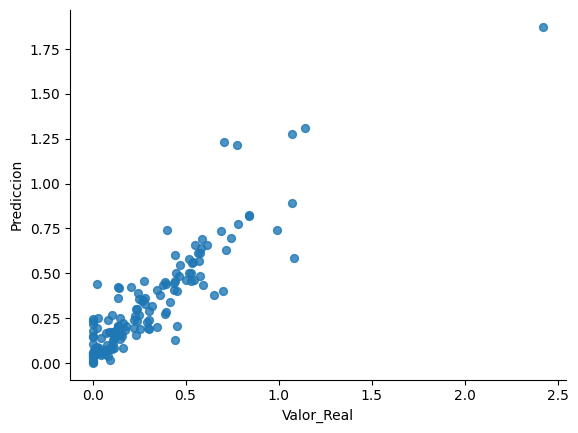

In [80]:
from matplotlib import pyplot as plt
df_comparacion.plot(kind='scatter', x='Valor_Real', y='Prediccion', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

* La gran mayoría de los puntos se agrupan cerca de la línea horizontal de Y=0, especialmente para predicciones entre 0 y 0.75. Esto sugiere que, para muchas predicciones en ese rango, el modelo tiene un error relativamente bajo.

> Cross Validation



In [81]:
#CV

rf = RandomForestRegressor(random_state=42)
scores = cross_val_score(rf, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
r2scores = cross_val_score(rf, X_train, y_train, cv=10, scoring='r2')
print("MSE promedio: {:.4f}".format(-scores.mean()))
print("Desviación estándar del MSE: {:.4f}".format(scores.std()))
print("R2 promedio: {:.4f}".format(r2scores.mean()))
print("Desviación estándar del R2: {:.4f}".format(r2scores.std()))


MSE promedio: 0.0290
Desviación estándar del MSE: 0.0176
R2 promedio: 0.7430
Desviación estándar del R2: 0.1245


In [81]:
rf = RandomForestRegressor()
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X, y)
print("Mejores parámetros:", grid_search.best_params_)

Mejores parámetros: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


## 5.3 XGboost

In [82]:
print("\n\n--- Ejecutando XGBoost ---")

# --- Búsqueda de Hiperparámetros con GridSearchCV ---
print("\nBuscando mejores hiperparámetros para XGBoost...")

# Definimos la grilla de parámetros a probar (esta es una grilla simple, podés expandirla)
param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.05, 0.1, 0.3],
    'max_depth': [3, 5, 7],
    'colsample_bytree': [0.7, 1.0], # Fracción de columnas a usar por árbol
    'subsample': [0.7, 1.0]        # Fracción de muestras a usar por árbol
}

# Creamos el modelo XGBoost
xgbr = xgb.XGBRegressor(objective='reg:squarederror', random_state=42, n_jobs=-1)

# Creamos GridSearchCV
grid_search_xgb = GridSearchCV(estimator=xgbr, param_grid=param_grid_xgb,
                               cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)

# Entrenamos GridSearchCV
grid_search_xgb.fit(X_train, y_train)

# Obtenemos el mejor modelo
best_xgb = grid_search_xgb.best_estimator_
print(f"\nMejores parámetros para XGBoost: {grid_search_xgb.best_params_}")

# --- Validación Cruzada (CV) con el Mejor Modelo ---
print("\nRealizando Validación Cruzada con el mejor XGBoost...")
mse_scores_xgb = -cross_val_score(best_xgb, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
r2_scores_xgb = cross_val_score(best_xgb, X_train, y_train, cv=5, scoring='r2')

print(f"XGBoost - MSE promedio (CV): {mse_scores_xgb.mean():.4f}")
print(f"XGBoost - Desviación estándar del MSE (CV): {mse_scores_xgb.std():.4f}")
print(f"XGBoost - R2 promedio (CV): {r2_scores_xgb.mean():.4f}")
print(f"XGBoost - Desviación estándar del R2 (CV): {r2_scores_xgb.std():.4f}")

# --- Evaluación Final en el Conjunto de Prueba ---
print("\nEvaluando el mejor XGBoost en el conjunto de prueba...")
y_pred_xgb = best_xgb.predict(X_test)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"XGBoost - MSE en Test: {mse_xgb:.4f}")
print(f"XGBoost - R2 en Test: {r2_xgb:.4f}")



--- Ejecutando XGBoost ---

Buscando mejores hiperparámetros para XGBoost...
Fitting 5 folds for each of 108 candidates, totalling 540 fits

Mejores parámetros para XGBoost: {'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300, 'subsample': 1.0}

Realizando Validación Cruzada con el mejor XGBoost...
XGBoost - MSE promedio (CV): 0.0275
XGBoost - Desviación estándar del MSE (CV): 0.0130
XGBoost - R2 promedio (CV): 0.7605
XGBoost - Desviación estándar del R2 (CV): 0.0819

Evaluando el mejor XGBoost en el conjunto de prueba...
XGBoost - MSE en Test: 0.0176
XGBoost - R2 en Test: 0.8288


In [90]:
if isinstance(y_test, pd.DataFrame):
    if len(y_test.columns) == 1:
        y_test_series = y_test.iloc[:, 0]
    else:
        y_test_series = y_test.iloc[:, 0]
else:
    y_test_series = y_test
y_pred_series = pd.Series(y_pred, index=y_test_series.index, name='Prediccion') # Esto asegura que cada predicción se alinee con su valor real.

df_comparacion = pd.DataFrame({
    'Valor_Real': y_test_series,
    'Prediccion': y_pred_series
}) #  Crear el DataFrame final (Ahora ambos tienen el mismo índice) ---


#  Calcular las diferencias ---
df_comparacion['Diferencia'] = df_comparacion['Valor_Real'] - df_comparacion['Prediccion']
df_comparacion['Diferencia_%'] = (df_comparacion['Diferencia'] / (df_comparacion['Valor_Real'] + 1e-6)) * 100
df_comparacion_XG = df_comparacion.copy()
# ver
df_comparacion_XG

Valor_Real  Prediccion  Diferencia  Diferencia_%
336    0.454695    0.400453    0.054242  1.192930e+01
517    0.122351    0.146558   -0.024206 -1.978417e+01
598    0.139248    0.362859   -0.223611 -1.605837e+02
33     0.301576    0.240273    0.061303  2.032759e+01
439    0.000000    0.103280   -0.103280 -1.032800e+07
..          ...         ...         ...           ...
382    0.134263    0.203879   -0.069615 -5.184944e+01
328    0.229057    0.264269   -0.035212 -1.537248e+01
568    0.269304    0.353029   -0.083725 -3.108915e+01
429    0.568549    0.614331   -0.045782 -8.052376e+00
136    0.103525    0.078906    0.024619  2.378051e+01

[145 rows x 4 columns]

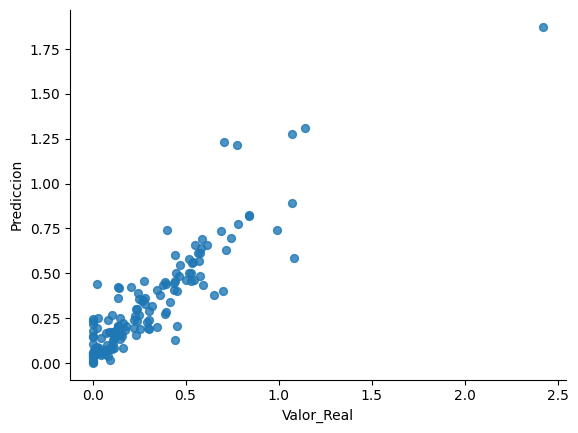

In [91]:
from matplotlib import pyplot as plt
df_comparacion_XG.plot(kind='scatter', x='Valor_Real', y='Prediccion', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)